--- Original Electric Vehicle Data Sample ---
        Car_name           Car_price Batter_cap         Drive_range  \
0    MG Comet EV           7.98 lakh   17.3 kWh  230 km/full charge   
1  Tata Tiago EV   8.69 - 11.99 lakh   19.2 KWh  250 km/full charge   
2  Tata Tigor EV  12.49 - 13.75 lakh     26 kWh  315 km/full charge   
3       MG ZS EV  23.38 - 27.40 lakh   50.3 kWh  461 km/full charge   
4     BYD Atto 3  33.99 - 34.49 lakh  60.48 kWh  521 km/full charge   

               Power     Charge_time transmission Boot_space Top_speed  
0          41.42 Bhp         7 Hours    Automatic       None      None  
1  60.34 - 73.75 Bhp  58 Min(10-80%)         None      240 L      None  
2          73.75 Bhp            7.5h    Automatic      316 L      None  
3         174.33 Bhp  8.5 to 9 Hours    Automatic       None  175 km/h  
4         201.15 Bhp    9.5-10 Hours    Automatic      440 L  160 km/h  


--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entr

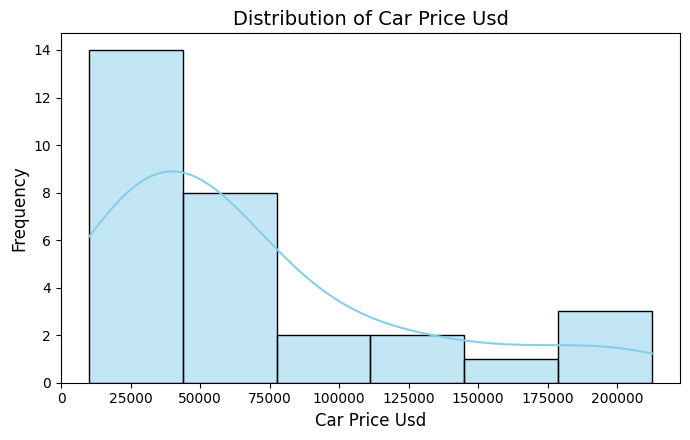

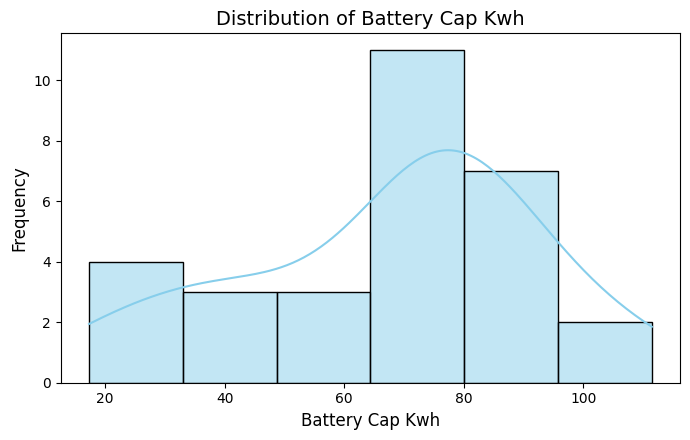

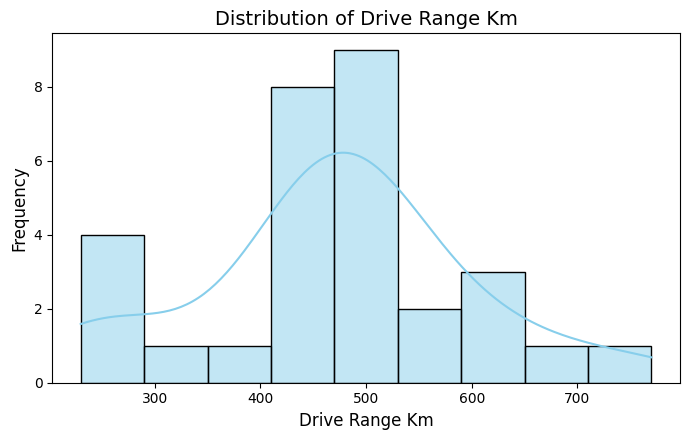

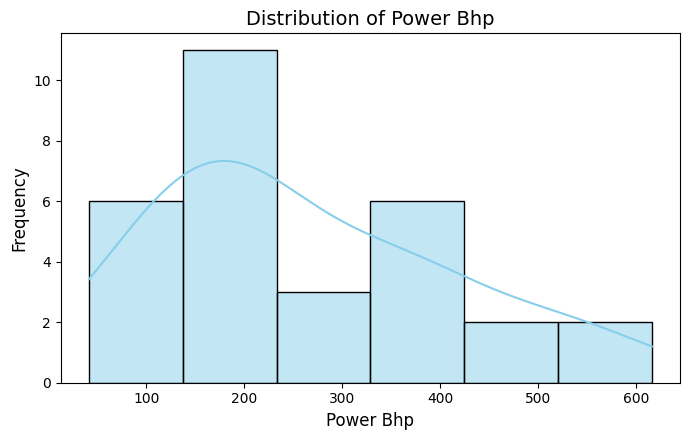

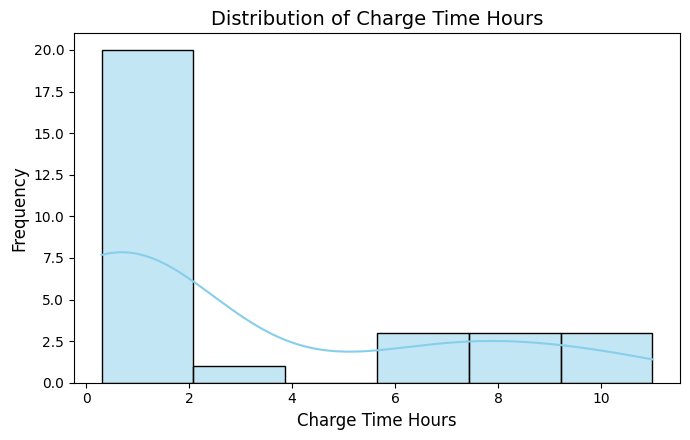

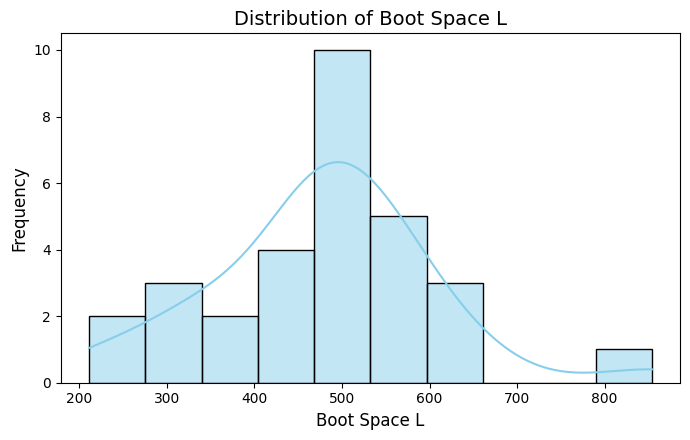

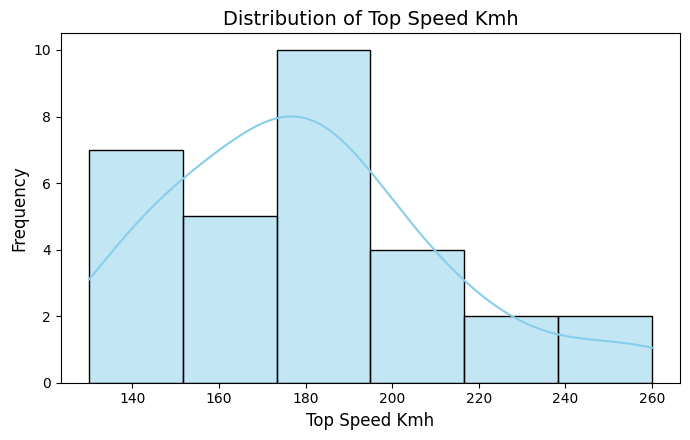

--- Shape of Prepared Features for Clustering ---
(30, 9)


--- Determining Optimal Number of Clusters (K) ---
Calculating WCSS for Elbow Method...


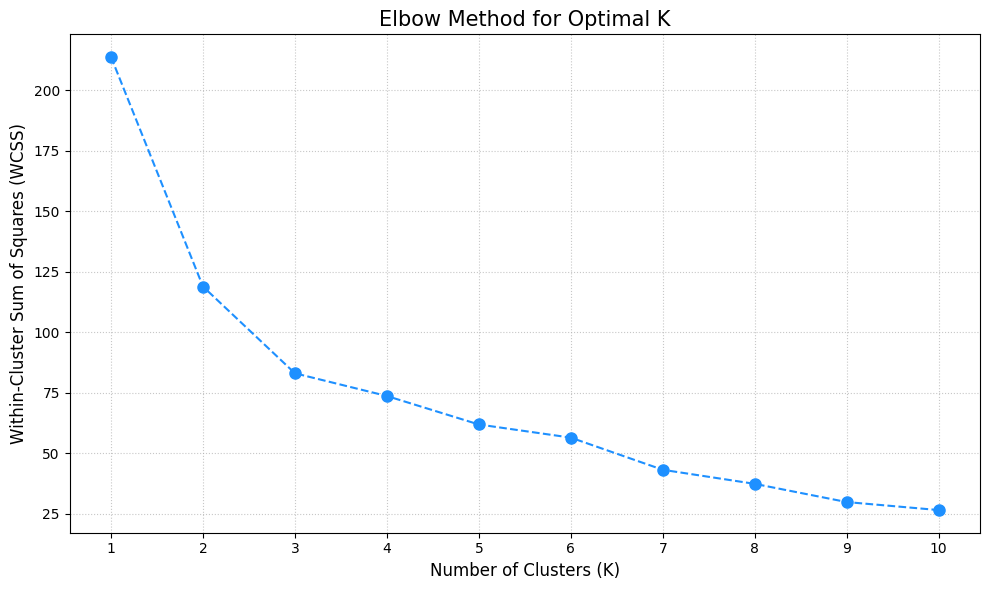


Calculating Silhouette Scores...
For K=2, Silhouette Score: 0.3336
For K=3, Silhouette Score: 0.3599
For K=4, Silhouette Score: 0.3559
For K=5, Silhouette Score: 0.2941
For K=6, Silhouette Score: 0.2958
For K=7, Silhouette Score: 0.2947
For K=8, Silhouette Score: 0.2534
For K=9, Silhouette Score: 0.2691
For K=10, Silhouette Score: 0.2511


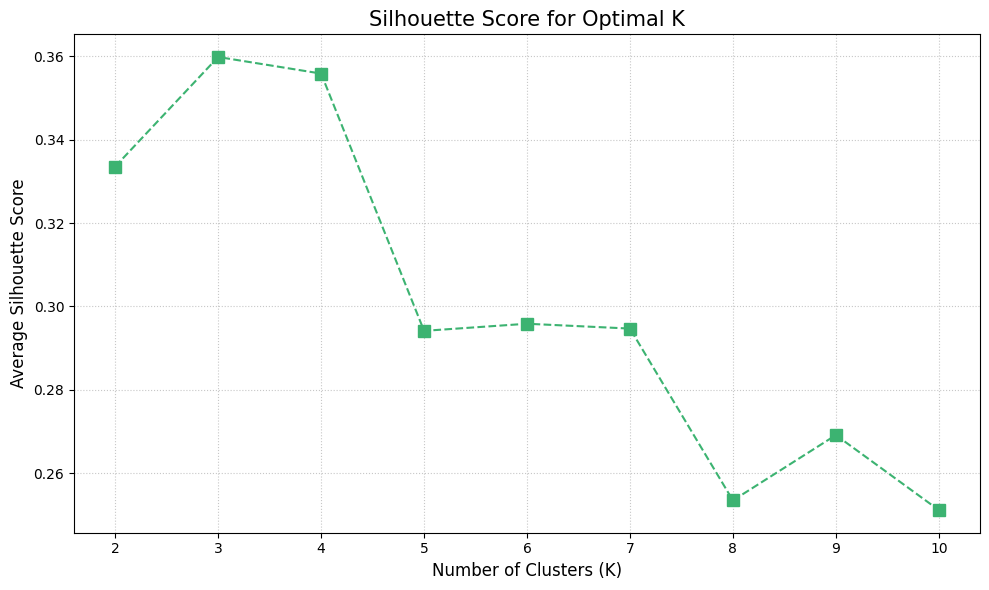


Proceeding with K = 4 clusters based on analysis.

--- Clustered Data Sample (First 5 Rows) ---
   car_price_usd  battery_cap_kwh  drive_range_km  power_bhp  \
0         9975.0            17.30           230.0      41.42   
1        10862.5            19.20           250.0      60.34   
2        15612.5            26.00           315.0      73.75   
3        29225.0            50.30           461.0     174.33   
4        42487.5            60.48           521.0     201.15   

   charge_time_hours  boot_space_l  top_speed_kmh    transmission_cleaned  \
0           7.000000         482.0          180.0  Single Speed Automatic   
1           0.966667         240.0          180.0  Single Speed Automatic   
2           7.500000         316.0          180.0  Single Speed Automatic   
3           9.000000         482.0          175.0  Single Speed Automatic   
4          10.000000         440.0          160.0  Single Speed Automatic   

        Car_name  cluster  
0    MG Comet EV        2  

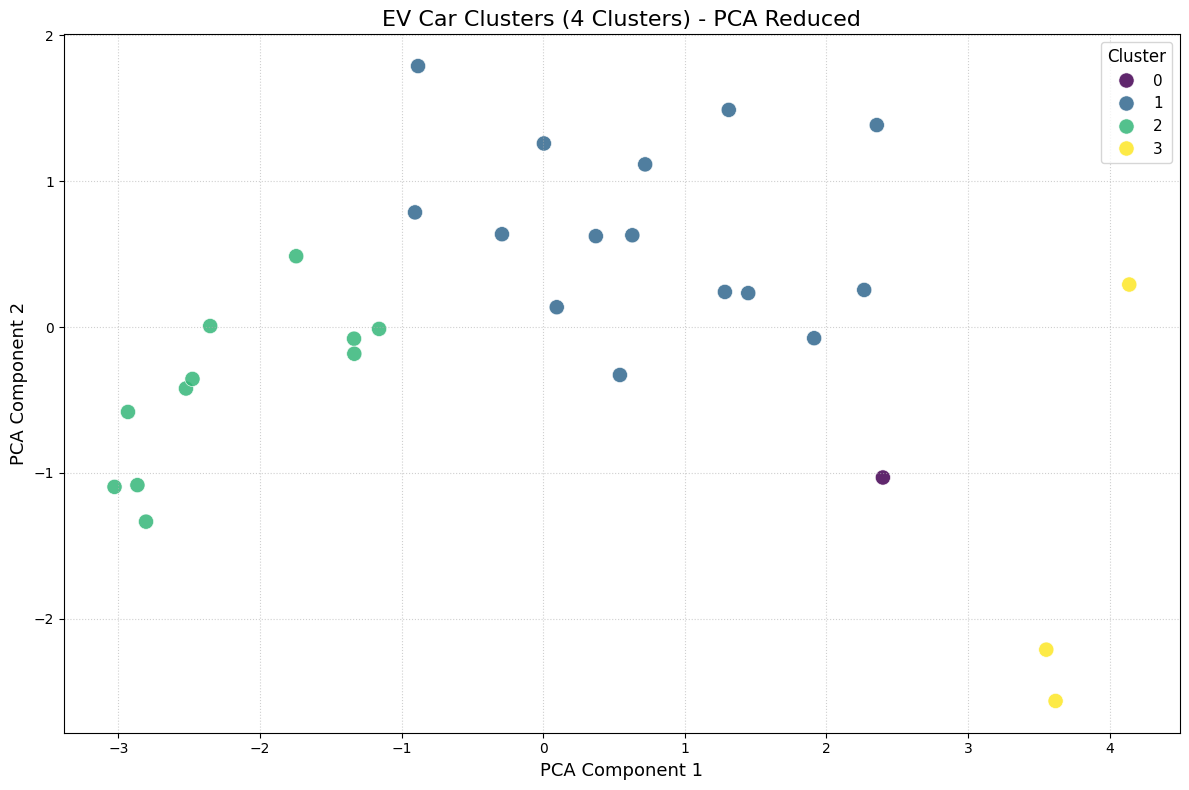

--- Cluster Profiles: Mean Values for Numerical Features ---
         car_price_usd  battery_cap_kwh  drive_range_km  power_bhp  \
cluster                                                              
0            151250.00           111.50          630.00     516.00   
1             68395.83            77.95          514.73     284.82   
2             25642.05            41.16          365.45     130.51   
3            197916.67            98.20          584.67     551.67   

         charge_time_hours  boot_space_l  top_speed_kmh  
cluster                                                  
0                    11.00        500.00         200.00  
1                     0.65        553.53         180.27  
2                     6.12        364.00         160.09  
3                     0.43        515.33         240.00  


--- Cluster Profiles: Mode for Categorical Features ---
             transmission_cleaned
cluster                          
0        [Single Speed Automatic]
1        [

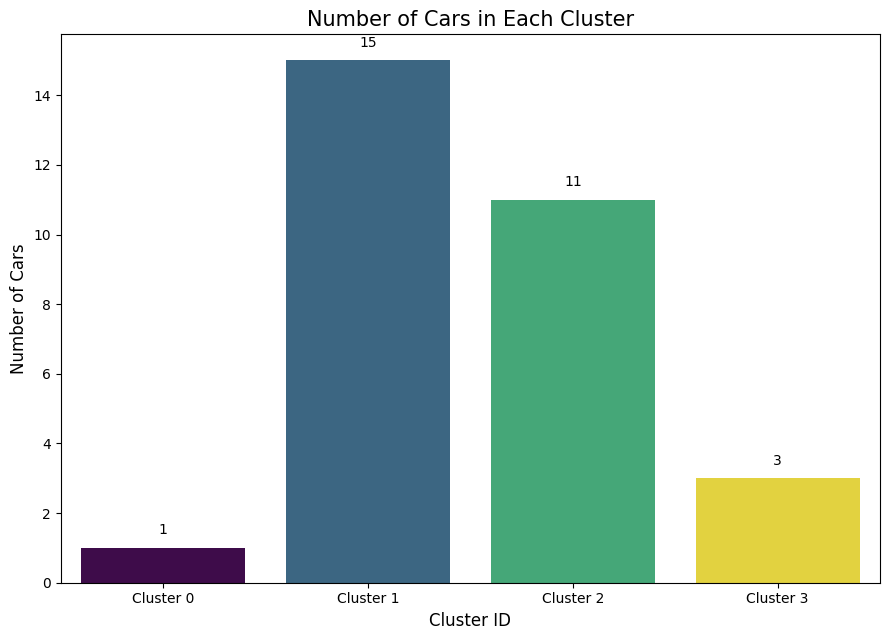

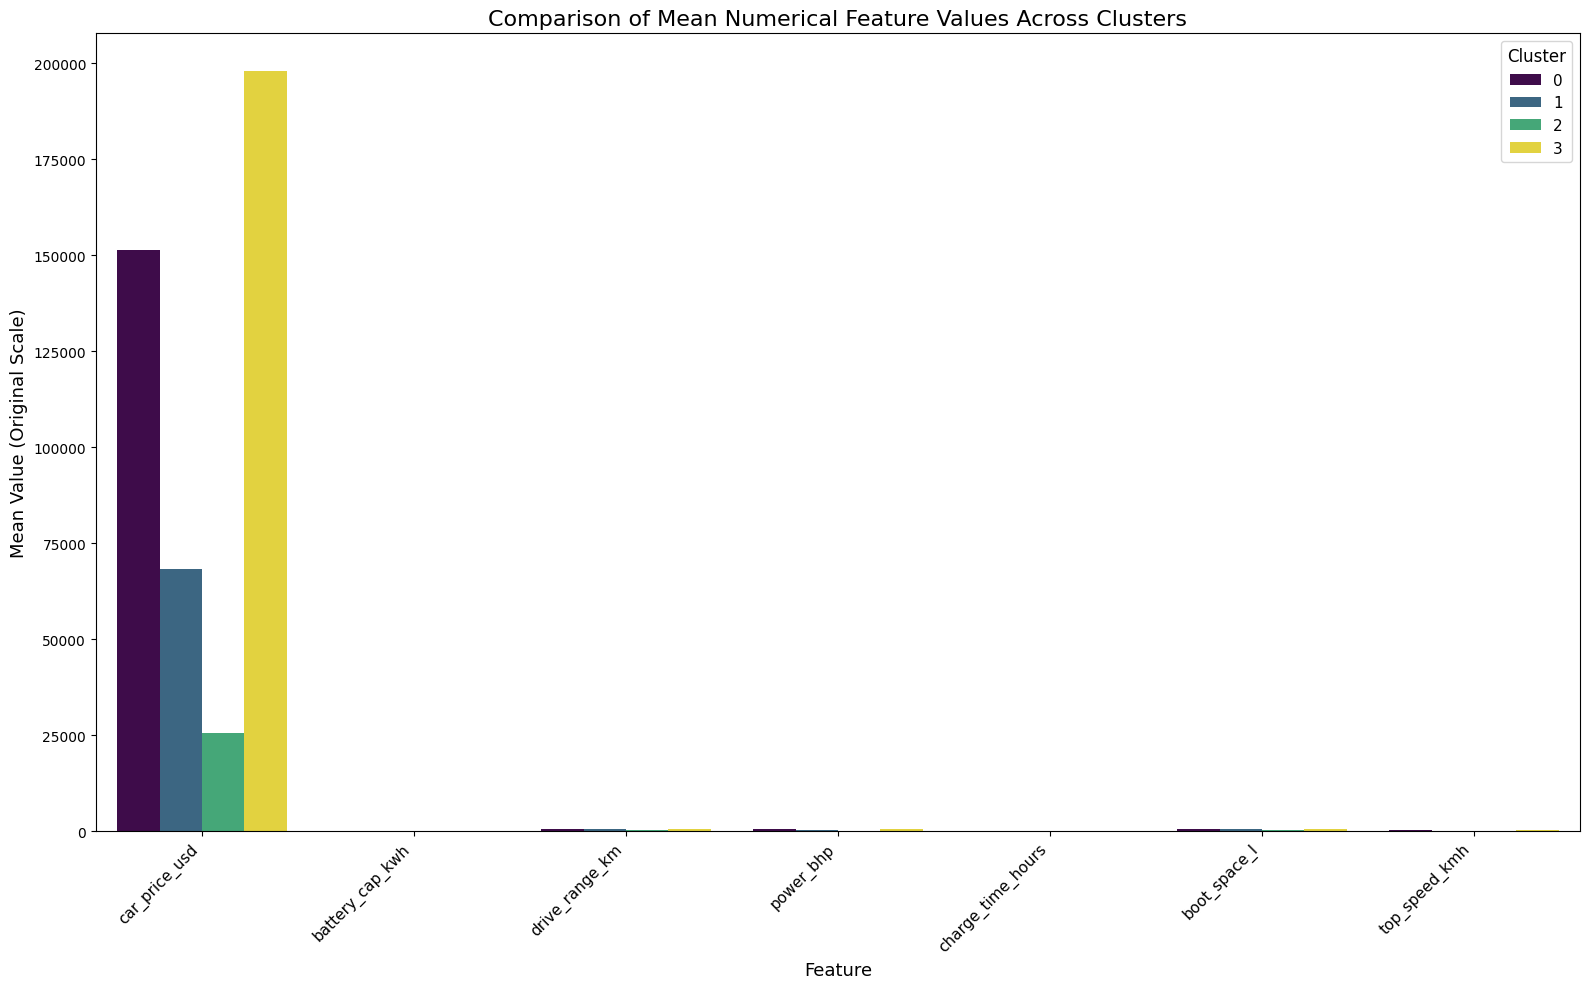

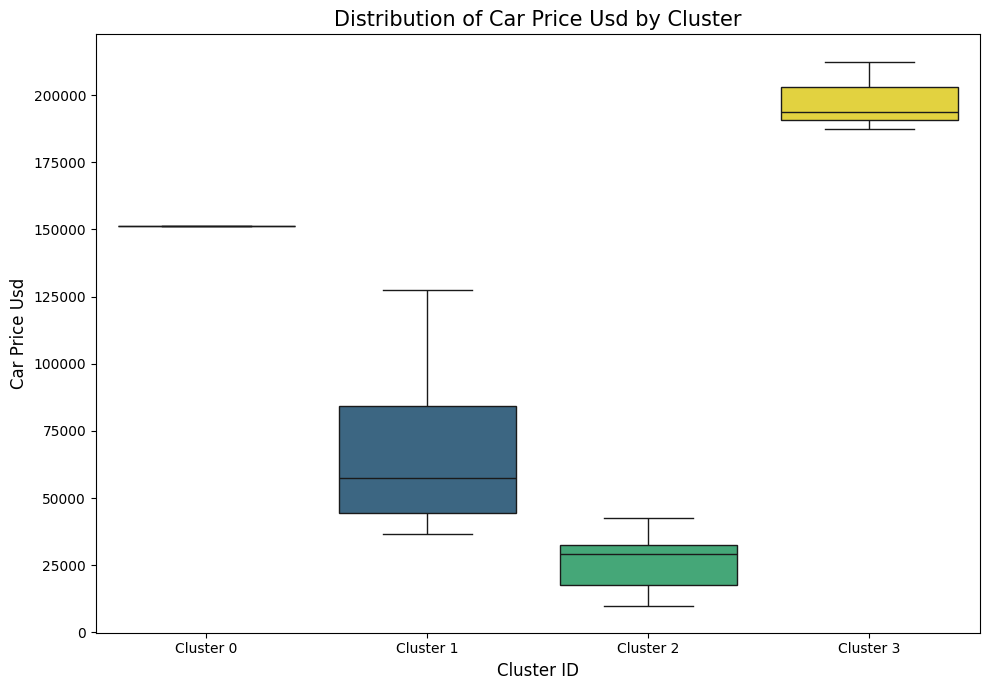

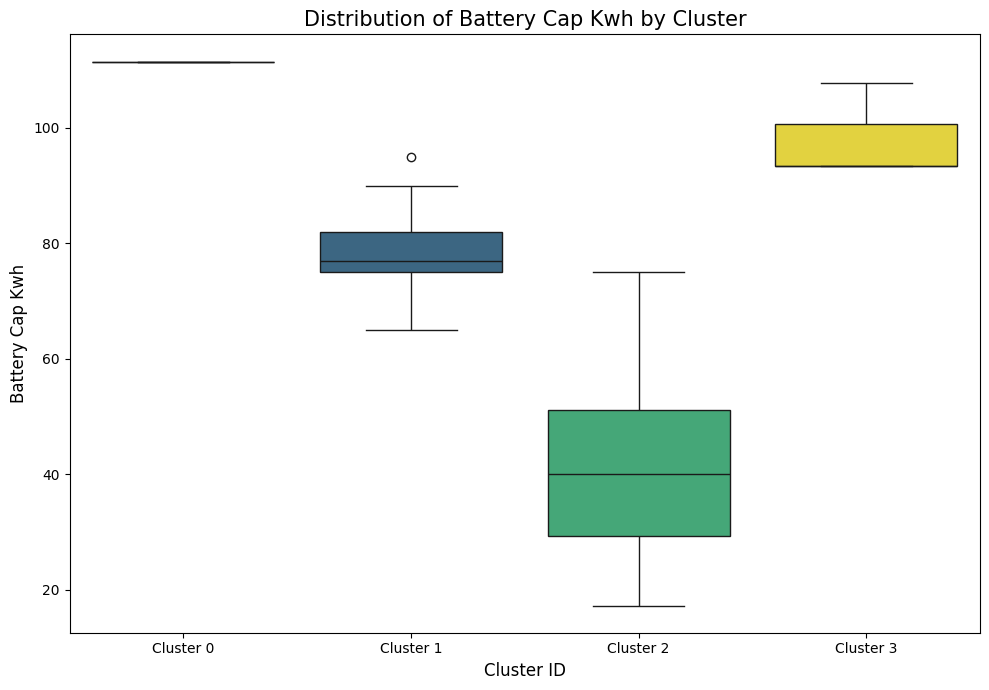

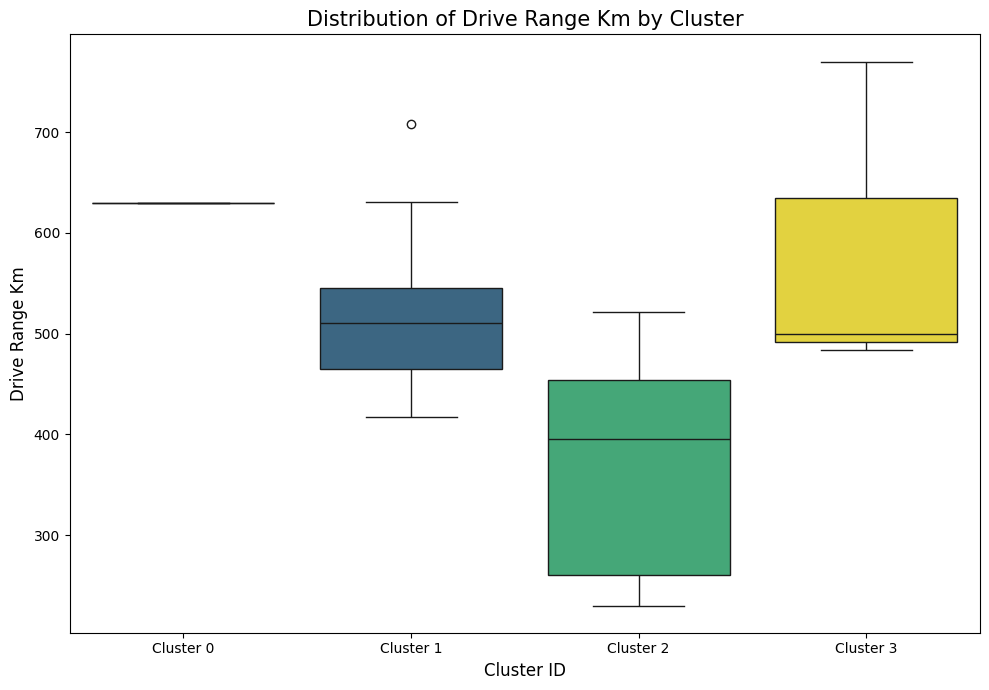

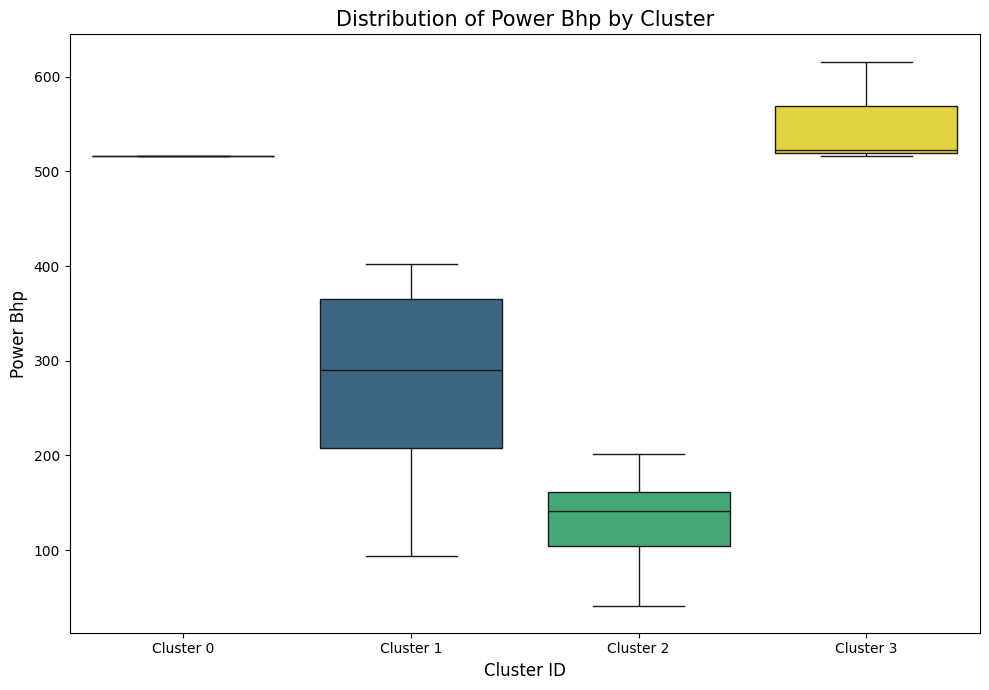

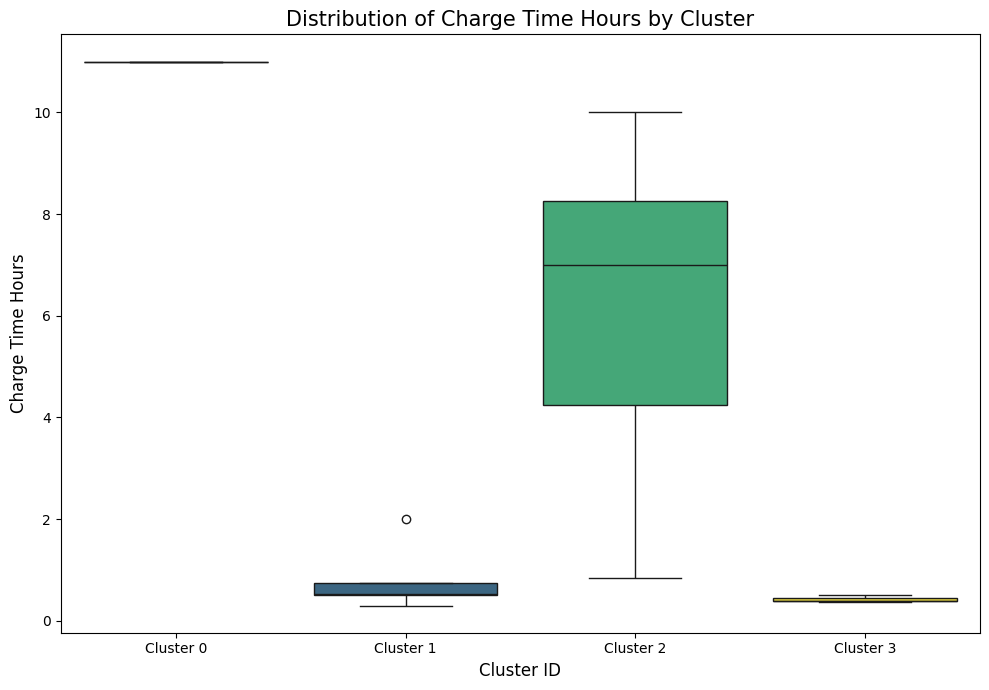

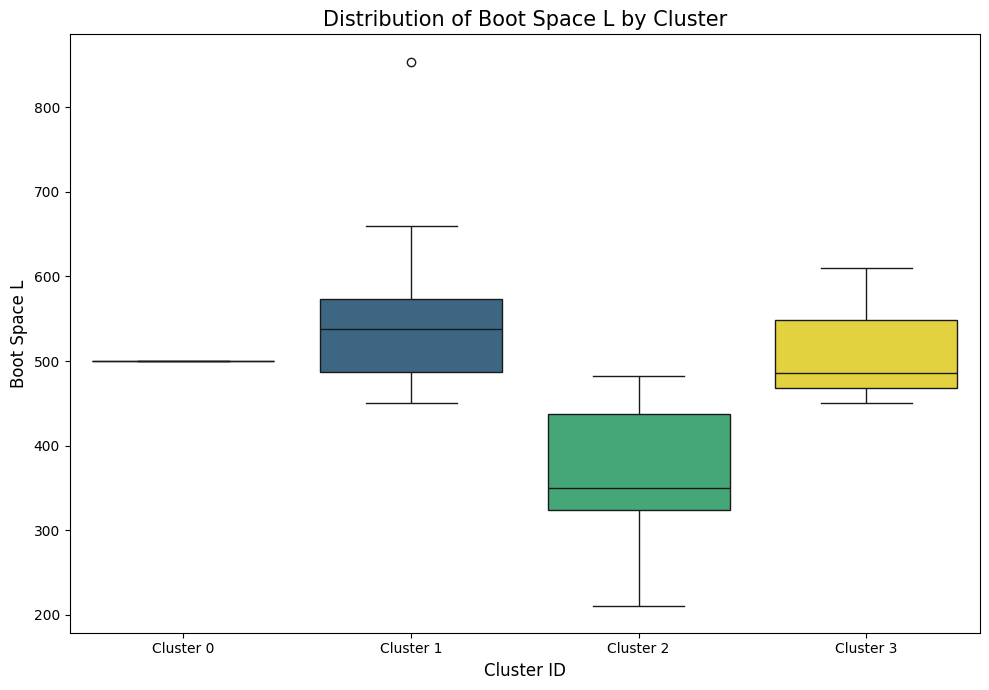

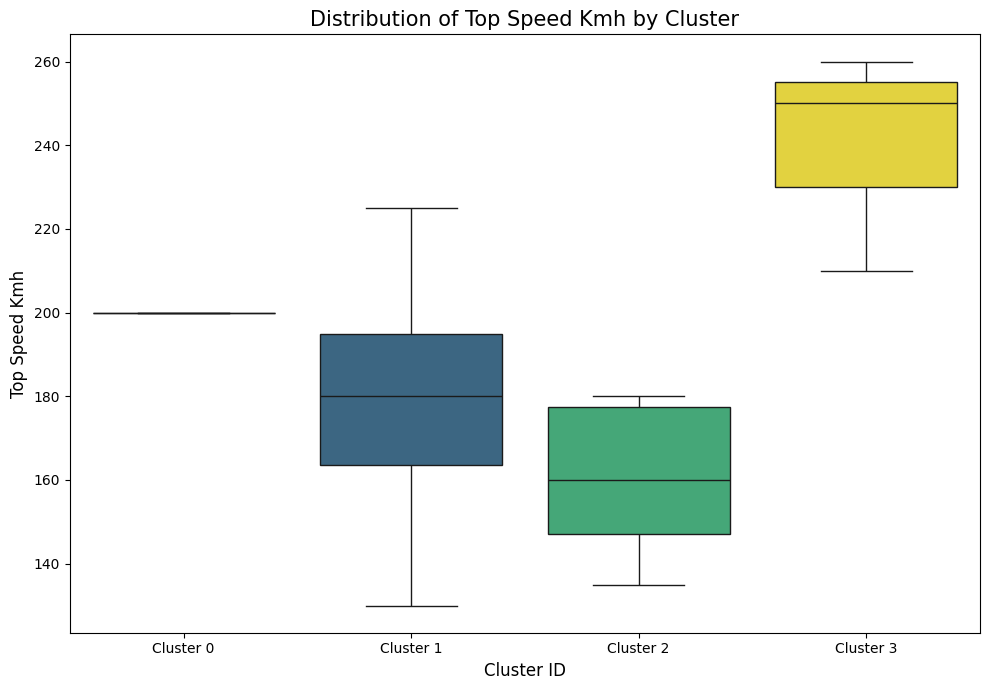


--- Distribution of 'Transmission Cleaned' Across Clusters ---
transmission_cleaned  2-Speed Automatic  Single Speed Automatic
cluster                                                        
0                                     0                       1
1                                     0                      15
2                                     0                      11
3                                     2                       1


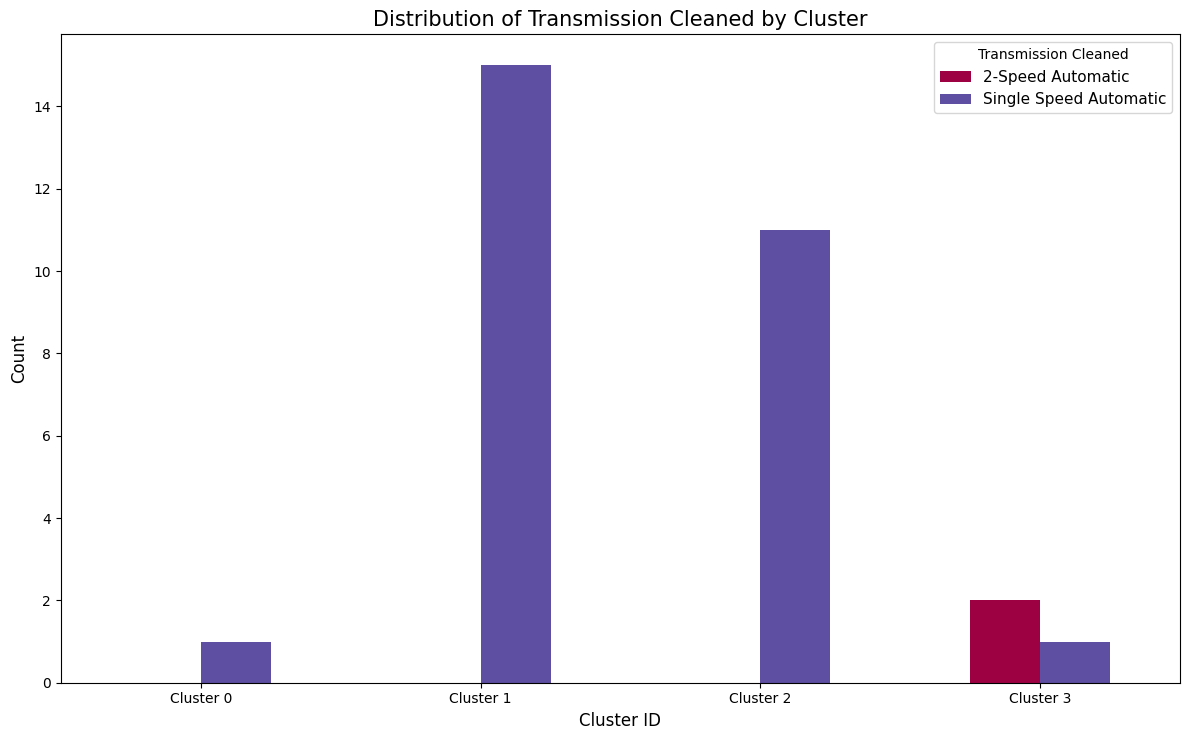

<ipython-input-2-006d2b7dc243>:394: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  radar_colors = plt.cm.get_cmap("Set1", OPTIMAL_K_CLUSTERS)


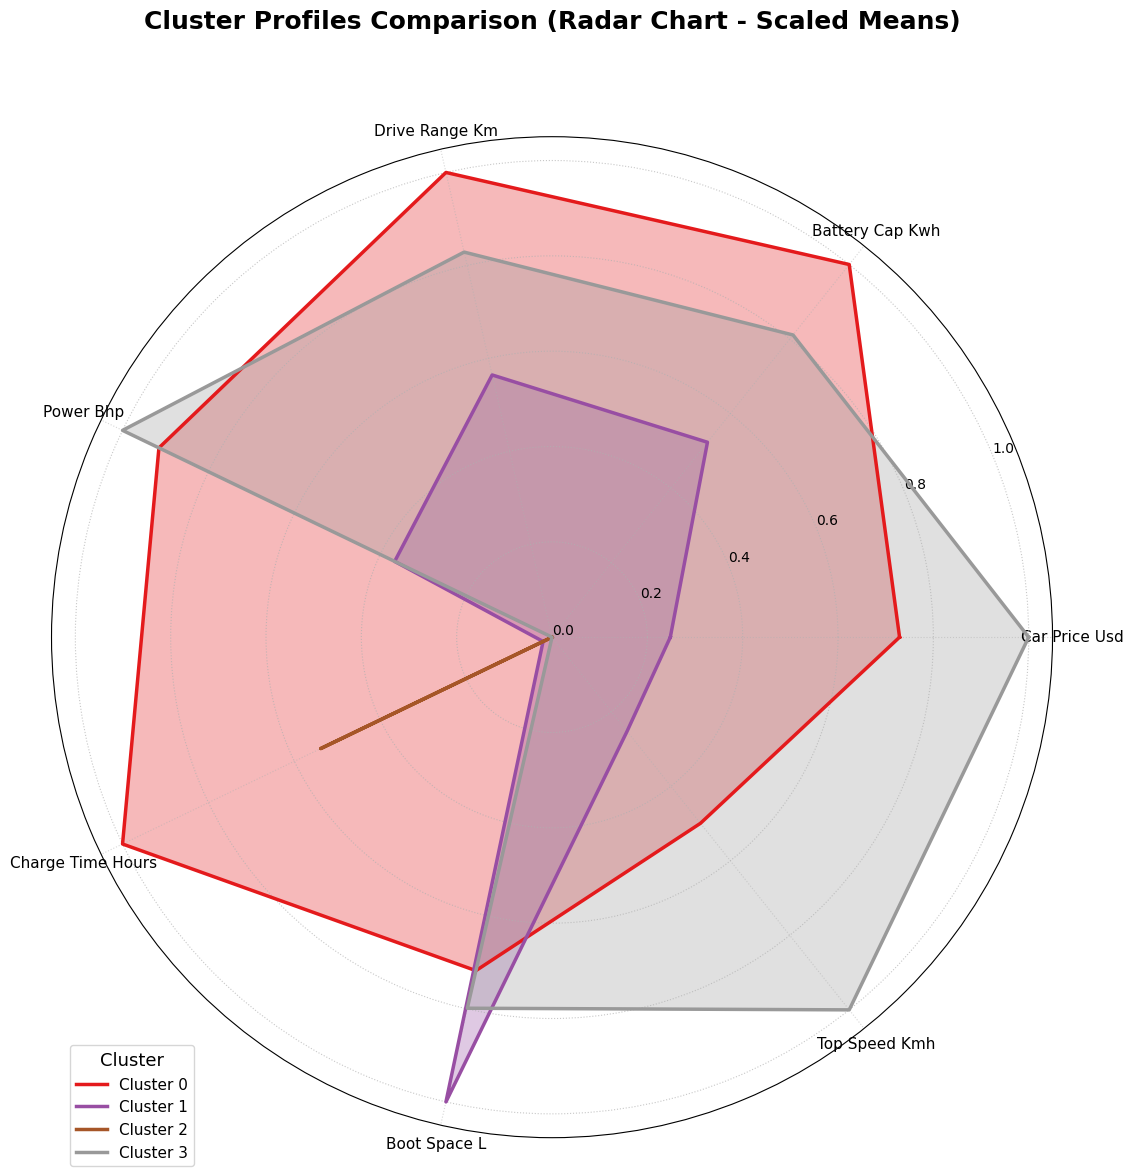


Generating Pair Plot for selected features by cluster (this may take some time)...
Note: Generating pair plot for 7 features. This can be visually dense. Consider selecting a subset for clarity.


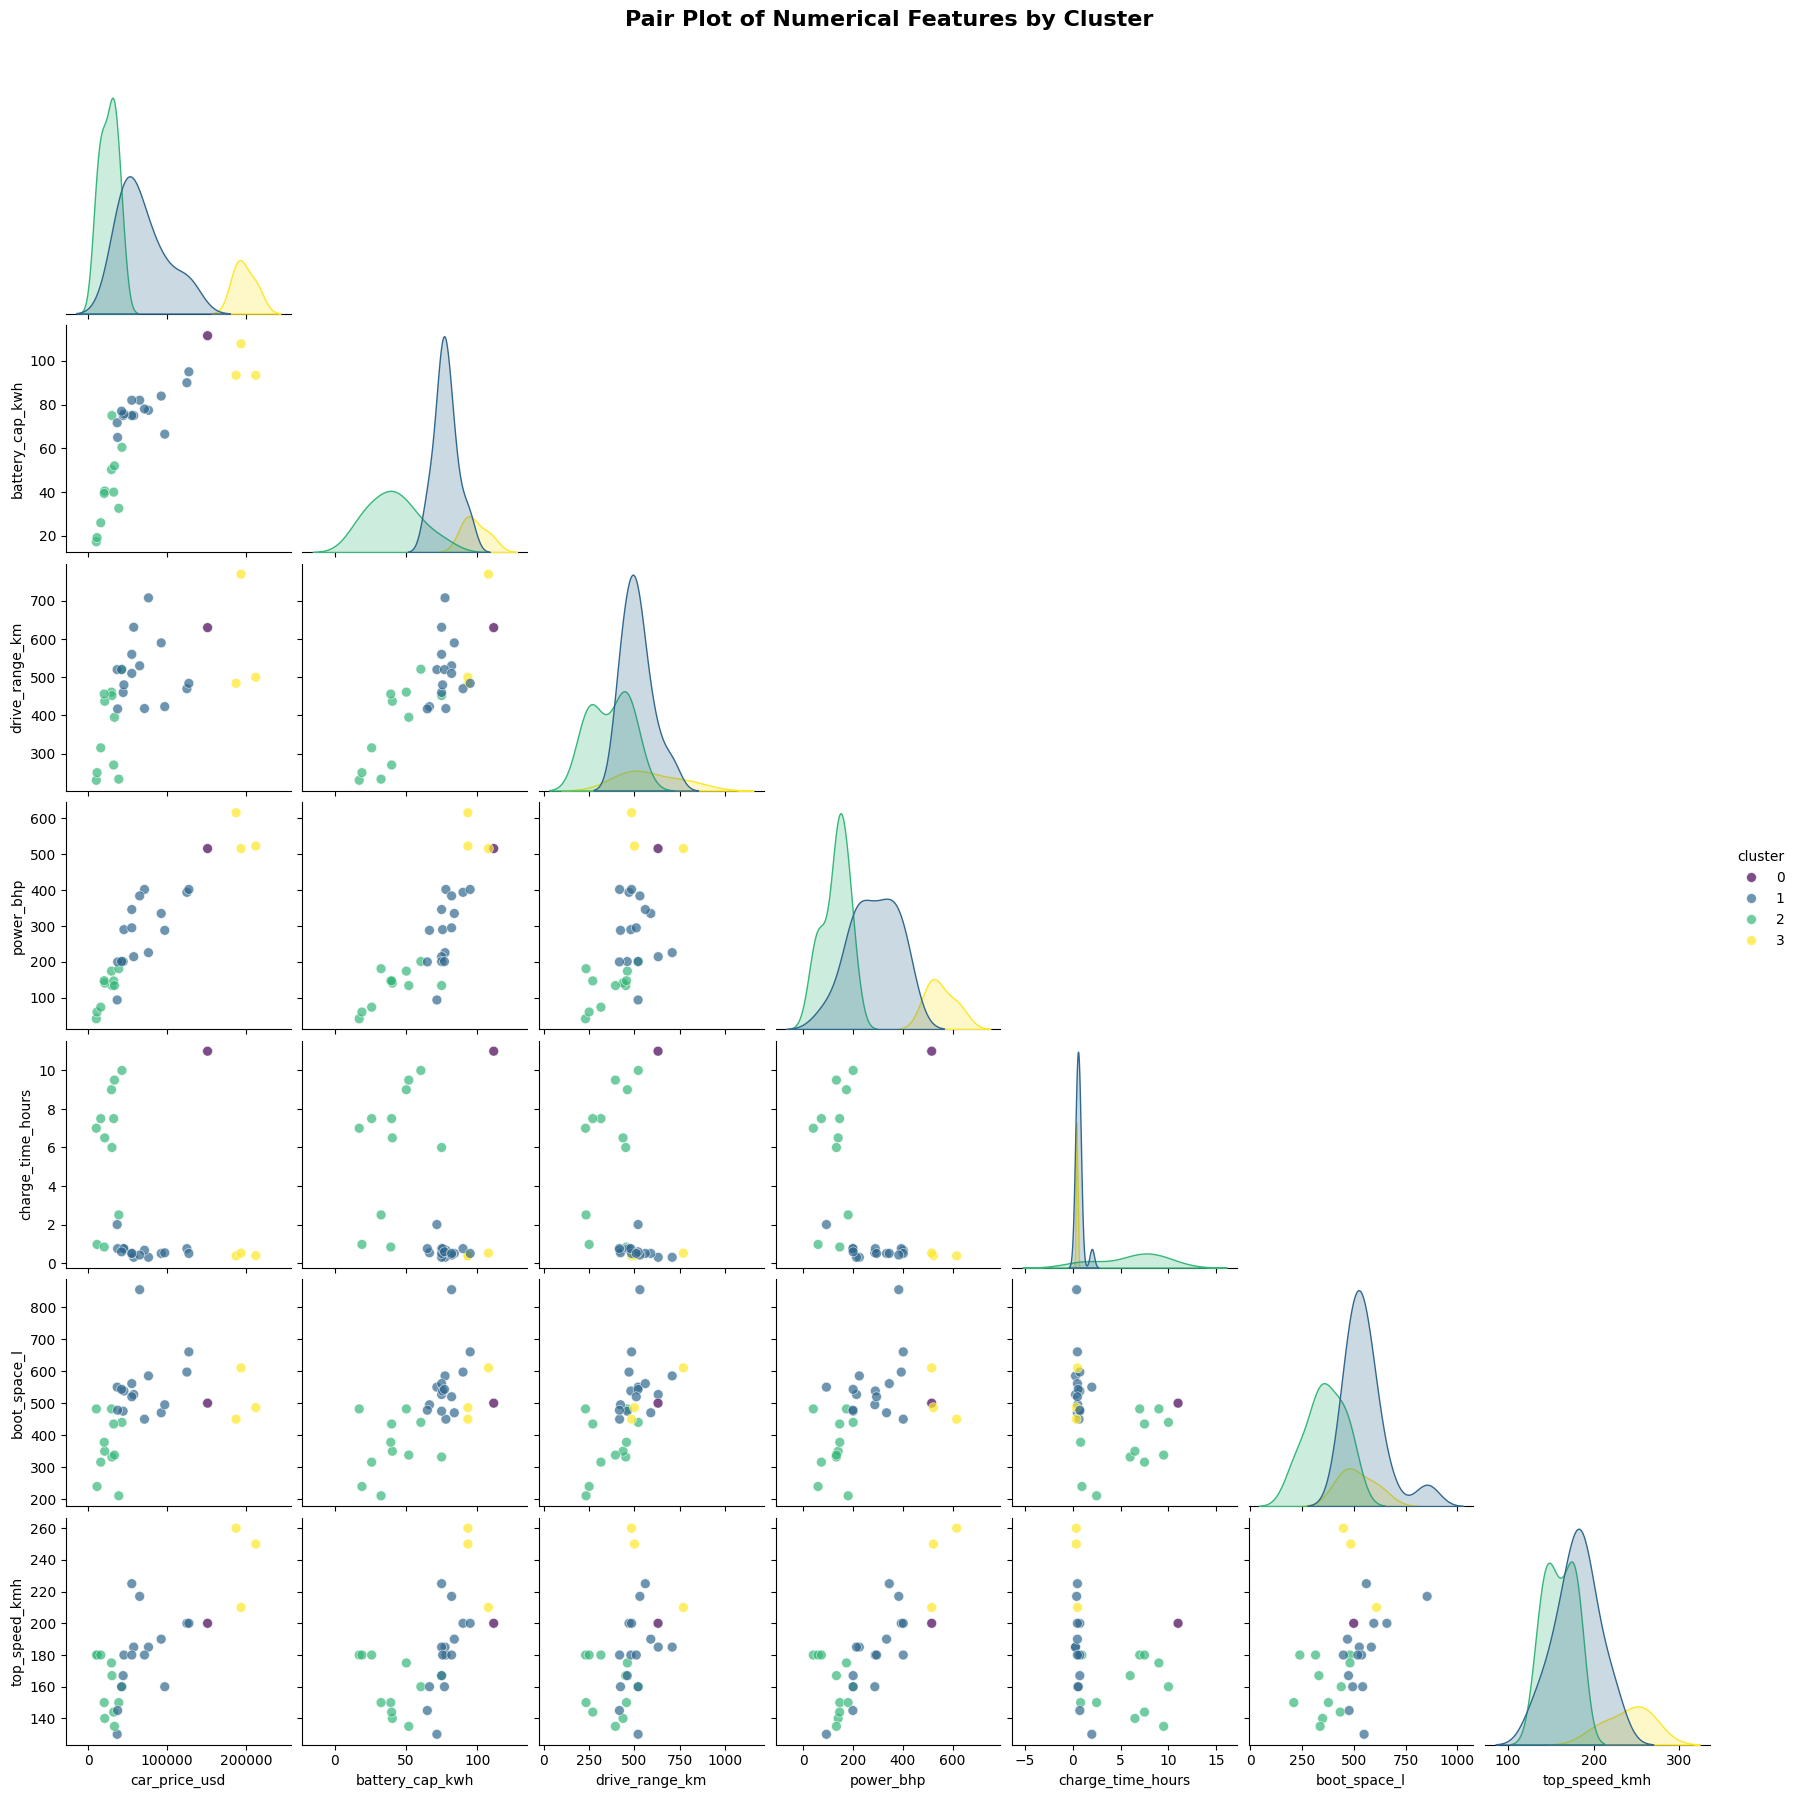


--- End of Electric Vehicle Clustering Analysis ---


In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

data = {
    'Car_name': ['MG Comet EV', 'Tata Tiago EV', 'Tata Tigor EV', 'MG ZS EV', 'BYD Atto 3',
                 'Hyundai Kona Electric', 'Tata Nexon EV Max', 'Mahindra XUV400 EV', 'Kia EV6', 'BYD E6',
                 'Hyundai Ioniq 5', 'BMW iX', 'BMW i4', 'Volvo XC40 Recharge', 'Mercedes-Benz EQB',
                 'Kia Niro EV', 'Mini Cooper SE', 'Porsche Taycan', 'Audi e-tron GT', 'Jaguar I-PACE',
                 'Mercedes-Benz EQS', 'Audi e-tron (SUV)', 'Tesla Model 3', 'Tesla Model Y', 'Nissan Leaf',
                 'Renault Zoe', 'Chevrolet Bolt EV', 'Ford Mustang Mach-E', 'Volkswagen ID.4', 'Audi Q4 e-tron'],
    'Car_price': ['7.98 lakh', '8.69 - 11.99 lakh', '12.49 - 13.75 lakh', '23.38 - 27.40 lakh', '33.99 - 34.49 lakh',
                  '23.84 lakh', '16.49 - 18.79 lakh', '15.99 - 18.99 lakh', '60.95 - 65.95 lakh', '29.15 lakh',
                  '45.95 lakh', '1.21 Cr', '73.90 lakh', '56.90 lakh', '77.50 lakh',
                  '40000 EUR', '35000 EUR', '1.5 Cr', '1.7 Cr', '1.0 Cr',
                  '1.55 Cr', '1.02 Cr', '55000 USD', '65000 USD', '32000 USD',
                  '30000 EUR', '37000 USD', '45000 USD', '42000 USD', '50000 EUR'],
    'Batter_cap': ['17.3 kWh', '19.2 KWh', '26 kWh', '50.3 kWh', '60.48 kWh',
                   None, '40.5 kWh', '39.4 kWh', '77.4 kWh', '71.7 kWh',
                   None, '111.5 kWh', '83.9 kWh', '78 kWh', '66.5 kWh',
                   None, '32.6 kWh', '93.4 kWh', '93.4 kWh', '90 kWh',
                   '107.8 kWh', '95 kWh', '75 kWh', '82 kWh', '40 kWh',
                   '52 kWh', '65 kWh', '75.7 kWh', '77 kWh', '82 kWh'],
    'Drive_range': ['230 km/full charge', '250 km/full charge', '315 km/full charge', '461 km/full charge', '521 km/full charge',
                    '452 km/full charge', '437 km/full charge', '456 km/full charge', '708 km/full charge', '520 km/full charge',
                    '631 km/full charge', '630 km (WLTP)', '590 km (WLTP)', '418 km (WLTP)', '423 km (WLTP)',
                    '460 km', '233 km', '484 km', '500 km', '470 km',
                    '770 km', '484 km', '560 km', '530 km', '270 km',
                    '395 km', '417 km', '480 km', '520 km', '510 km'],
    'Power': ['41.42 Bhp', '60.34 - 73.75 Bhp', '73.75 Bhp', '174.33 Bhp', '201.15 Bhp',
              '134.1 Bhp', '141 Bhp', '147.5 Bhp', '225.8 - 320.5 Bhp', '93.87 Bhp',
              '214.56 Bhp', '516 Bhp', '335 Bhp', '402 Bhp', '288 Bhp',
              '201 Bhp', '181 Bhp', '616 Bhp', '523 Bhp', '394 Bhp',
              '516 Bhp', '402 Bhp', '346 Bhp', '384 Bhp', '147 Bhp',
              '134 Bhp', '200 Bhp', '290 Bhp', '201 Bhp', '295 Bhp'],
    'Charge_time': ['7 Hours', '58 Min(10-80%)', '7.5h', '8.5 to 9 Hours', '9.5-10 Hours',
                    '6 H (7.2kW AC)', '6.5 hours (7.2kW AC)', '50 min (DC Fast)', '18 min (350kW DC)', '2 H (DC Fast)',
                    '18 min (DC Fast 350kW)', '11 hours (AC)', '30 min (DC 150kW 10-80%)', '40 min (DC 10-80%)', '32 min (DC 10-80%)',
                    '45 mins (DC Fast)', '2.5 hours (AC)', '22.5 mins (DC 5-80%)', '23 min (DC 270kW)', '45 min (DC Fast 100kW)',
                    '31 mins (DC 10-80%)', '30 min (DC Fast)', '30 min (Supercharger)', '25 min (Supercharger)', '7.5 hours (AC)',
                    '9.5 hours (AC)', '1 hour (DC Fast)', '45 mins (DC Fast)', '35 min (DC Fast)', '30 min (DC Fast)'],
    'transmission': ['Automatic', None, 'Automatic', 'Automatic', 'Automatic',
                     'Automatic', None, 'Automatic', 'Automatic', 'Automatic',
                     'Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Automatic',
                     'Automatic', 'Automatic', '2-Speed Automatic', '2-Speed Automatic', 'Single Speed Automatic',
                     'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic',
                     'Automatic', 'Automatic', 'Single Speed Automatic', 'Automatic', 'Automatic'],
    'Boot_space': [None, '240 L', '316 L', None, '440 L',
                   '332 L', '350 L', '378 L', '585 L', '550 L',
                   '527 L', '500 L', '470 L', '419 L + 31 L (frunk)', '495 L',
                   '475 L', '211 L', '366 L + 84 L (frunk)', '405 L + 81 L (frunk)', '540 L + 57L (frunk)',
                   '610 L', '660 L', '561 L', '854 L (rear)', '435 L',
                   '338 L', '478 L', '402 L + 136 L (frunk)', '543 L', '520 L' ],
    'Top_speed': [None, None, None, '175 km/h', '160 km/h',
                  '167 km/h', '140 km/h', '150 km/h', '185 km/h', '130 km/h',
                  '185 km/h', '200 km/h', '190 km/h', '180 km/h', '160 km/h',
                  '167 km/h', '150 km/h', '260 km/h', '250 km/h', '200 km/h',
                  '210 km/h', '200 km/h', '225 km/h', '217 km/h', '144 km/h',
                  '135 km/h', '145 km/h', '180 km/h', '160 km/h', '180 km/h']
}

df = pd.DataFrame(data)
print("--- Original Electric Vehicle Data Sample ---")
print(df.head())
print("\n")
print("--- DataFrame Information ---")
df.info()
print("\n")


def extract_first_number(text_value):
    if pd.isna(text_value):
        return np.nan
    match = re.search(r'(\d[\d,]*\.?\d*|\d+)', str(text_value).replace(',', ''))
    return float(match.group(1)) if match else np.nan

def convert_price_to_usd(price_text):
    if pd.isna(price_text): return np.nan
    price_text = str(price_text).upper().replace(',', '')
    numeric_value = extract_first_number(price_text)
    if numeric_value is None: return np.nan

    usd_per_eur = 1.1
    usd_per_gbp = 1.25
    inr_per_usd = 80
    lakh_multiplier = 100000
    crore_multiplier = 10000000

    if 'USD' in price_text: return numeric_value
    elif 'EUR' in price_text: return numeric_value * usd_per_eur
    elif 'GBP' in price_text: return numeric_value * usd_per_gbp
    elif 'CR' in price_text: return (numeric_value * crore_multiplier) / inr_per_usd
    elif 'LAKH' in price_text: return (numeric_value * lakh_multiplier) / inr_per_usd
    elif 'INR' in price_text: return numeric_value / inr_per_usd
    else: return numeric_value

def parse_charging_time_to_hours(time_text):
    if pd.isna(time_text): return np.nan
    time_text = str(time_text).lower()
    hours_value = 0

    hour_match = re.search(r'(\d+\.?\d*)\s*(?:hours|hrs|h)(?!\w)', time_text)
    if hour_match:
        hours_value += float(hour_match.group(1))

    minute_match = re.search(r'(\d+\.?\d*)\s*(?:minutes|mins|min)(?!\w)', time_text)
    if minute_match:
        hours_value += float(minute_match.group(1)) / 60

    if hours_value == 0:
        plain_number_match = re.match(r'^(\d+\.?\d+)$', time_text.strip())
        if plain_number_match:
            hours_value = float(plain_number_match.group(1))

    return hours_value if hours_value > 0 else np.nan

def parse_boot_space_liters(space_text):
    if pd.isna(space_text): return np.nan
    numbers_found = re.findall(r'(\d+\.?\d*)', str(space_text))
    return sum(float(n) for n in numbers_found) if numbers_found else np.nan

def standardize_transmission_type(transmission_text):
    if pd.isna(transmission_text):
        return np.nan
    transmission_text = str(transmission_text).lower()
    if 'automatic' in transmission_text:
        if '2-speed' in transmission_text or 'two-speed' in transmission_text:
            return '2-Speed Automatic'
        return 'Single Speed Automatic'
    elif 'manual' in transmission_text:
        return 'Manual'
    return 'Other'

# --- Process the DataFrame ---
df_processed = df.copy()

df_processed['car_price_usd'] = df_processed['Car_price'].apply(convert_price_to_usd)
df_processed['battery_cap_kwh'] = df_processed['Batter_cap'].apply(extract_first_number)
df_processed['drive_range_km'] = df_processed['Drive_range'].apply(extract_first_number)
df_processed['power_bhp'] = df_processed['Power'].apply(extract_first_number)
df_processed['charge_time_hours'] = df_processed['Charge_time'].apply(parse_charging_time_to_hours)
df_processed['boot_space_l'] = df_processed['Boot_space'].apply(parse_boot_space_liters)
df_processed['top_speed_kmh'] = df_processed['Top_speed'].apply(extract_first_number)
df_processed['transmission_cleaned'] = df_processed['transmission'].apply(standardize_transmission_type)

numerical_features = ['car_price_usd', 'battery_cap_kwh', 'drive_range_km', 'power_bhp', 'charge_time_hours', 'boot_space_l', 'top_speed_kmh']
categorical_features = ['transmission_cleaned']

print("\n--- Handling Missing Values ---")
for col in numerical_features:
    if df_processed[col].isnull().any():
        median_val = df_processed[col].median()
        print(f"Imputing missing values in '{col}' with median: {median_val:.2f}")
        df_processed[col] = df_processed[col].fillna(median_val)

for col in categorical_features:
    if df_processed[col].isnull().any():
        mode_val = df_processed[col].mode()[0]
        print(f"Imputing missing values in '{col}' with mode: '{mode_val}'")
        df_processed[col] = df_processed[col].fillna(mode_val)

car_names_column = df_processed['Car_name']
df_analysis_ready = df_processed[numerical_features + categorical_features].copy()

print("\n--- Processed Data Sample for Analysis (First 5 Rows) ---")
print(df_analysis_ready.head())
print("\n--- Missing Value Check After Imputation ---")
print(df_analysis_ready.isnull().sum())
print("\n")

print("--- Visualizing Feature Distributions ---")
for col in numerical_features:
    plt.figure(figsize=(7, 4.5))
    sns.histplot(df_analysis_ready[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14)
    plt.xlabel(col.replace("_", " ").title(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse_output=False for dense array
    ],
    remainder='passthrough'
)

features_prepared_for_clustering = data_preprocessor.fit_transform(df_analysis_ready)

if hasattr(features_prepared_for_clustering, "toarray"): # Should not be needed if sparse_output=False
    features_prepared_for_clustering = features_prepared_for_clustering.toarray()

print("--- Shape of Prepared Features for Clustering ---")
print(features_prepared_for_clustering.shape)
print("\n")

print("--- Determining Optimal Number of Clusters (K) ---")
print("Calculating WCSS for Elbow Method...")
wcss_scores = []
k_options = range(1, 11)
for k_val in k_options:
    kmeans_model_elbow = KMeans(n_clusters=k_val, init='k-means++', n_init='auto', random_state=42)
    kmeans_model_elbow.fit(features_prepared_for_clustering)
    wcss_scores.append(kmeans_model_elbow.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_options, wcss_scores, marker='o', linestyle='--', color='dodgerblue', markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
plt.xticks(k_options)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nCalculating Silhouette Scores...")
silhouette_avg_scores = []
k_options_silhouette = range(2, 11)
for k_val in k_options_silhouette:
    kmeans_model_silhouette = KMeans(n_clusters=k_val, init='k-means++', n_init='auto', random_state=42)
    temp_cluster_labels = kmeans_model_silhouette.fit_predict(features_prepared_for_clustering)
    if len(np.unique(temp_cluster_labels)) > 1:
         silhouette_val = silhouette_score(features_prepared_for_clustering, temp_cluster_labels)
         silhouette_avg_scores.append(silhouette_val)
         print(f"For K={k_val}, Silhouette Score: {silhouette_val:.4f}")
    else:
        silhouette_avg_scores.append(-1)
        print(f"For K={k_val}, Silhouette Score: N/A (single cluster problem)")

plt.figure(figsize=(10, 6))
plt.plot(k_options_silhouette, silhouette_avg_scores, marker='s', linestyle='--', color='mediumseagreen', markersize=8)
plt.title('Silhouette Score for Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Average Silhouette Score', fontsize=12)
plt.xticks(k_options_silhouette)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

OPTIMAL_K_CLUSTERS = 4
print(f"\nProceeding with K = {OPTIMAL_K_CLUSTERS} clusters based on analysis.\n")

final_kmeans_model = KMeans(n_clusters=OPTIMAL_K_CLUSTERS, init='k-means++', n_init='auto', random_state=42)
assigned_cluster_labels = final_kmeans_model.fit_predict(features_prepared_for_clustering)

df_with_clusters = df_analysis_ready.copy()
df_with_clusters['Car_name'] = car_names_column
df_with_clusters['cluster'] = assigned_cluster_labels

print("--- Clustered Data Sample (First 5 Rows) ---")
print(df_with_clusters.head())
print("\n")

print("--- Visualizing Clusters with PCA (if applicable) ---")
if features_prepared_for_clustering.shape[1] > 2:
    pca_model = PCA(n_components=2, random_state=42)
    features_pca_reduced = pca_model.fit_transform(features_prepared_for_clustering)
    df_pca_visualization = pd.DataFrame(data=features_pca_reduced, columns=['PCA_Component_1', 'PCA_Component_2'])
    df_pca_visualization['cluster'] = assigned_cluster_labels
    df_pca_visualization['Car_name'] = car_names_column

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PCA_Component_1', y='PCA_Component_2', hue='cluster', data=df_pca_visualization, palette='viridis', s=120, alpha=0.85, edgecolor='w', linewidth=0.5)
    plt.title(f'EV Car Clusters ({OPTIMAL_K_CLUSTERS} Clusters) - PCA Reduced', fontsize=16)
    plt.xlabel('PCA Component 1', fontsize=13)
    plt.ylabel('PCA Component 2', fontsize=13)
    plt.legend(title='Cluster', fontsize=11, title_fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()
elif features_prepared_for_clustering.shape[1] == 2:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=features_prepared_for_clustering[:, 0], y=features_prepared_for_clustering[:, 1], hue=assigned_cluster_labels, palette='viridis', s=100, alpha=0.8)
    plt.title(f'EV Car Clusters ({OPTIMAL_K_CLUSTERS} Clusters) - Original 2 Features', fontsize=16)
    processed_feature_names = data_preprocessor.get_feature_names_out()
    plt.xlabel(f'{processed_feature_names[0]} (Scaled)', fontsize=13)
    plt.ylabel(f'{processed_feature_names[1]} (Scaled)', fontsize=13)
    plt.legend(title='Cluster', fontsize=11, title_fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Data has only one feature after processing. Standard 2D scatter plot for clusters is not directly applicable.")

# --- Analyzing Cluster Profiles ---
print("--- Cluster Profiles: Mean Values for Numerical Features ---")
cluster_numerical_summary = df_with_clusters.groupby('cluster')[numerical_features].mean().round(2)
print(cluster_numerical_summary)
print("\n")

print("--- Cluster Profiles: Mode for Categorical Features ---")
cluster_categorical_summary = df_with_clusters.groupby('cluster')[categorical_features].agg(lambda x: x.mode().tolist())
print(cluster_categorical_summary)
print("\n")

print("--- Sample of Cars in Each Cluster ---")
for i in range(OPTIMAL_K_CLUSTERS):
    print(f"\n--- Cluster {i} Cars (Sample) ---")
    print(df_with_clusters[df_with_clusters['cluster'] == i][['Car_name'] + numerical_features].head())

# --- Suggestions ---
print("\n\n--- Alternative Clustering Algorithms to Explore ---")
print("1. Hierarchical Clustering (Agglomerative): Useful for understanding hierarchies and does not require pre-defining K.")
print("2. DBSCAN: Effective for clusters of varying shapes and identifying outliers.")
print("3. Gaussian Mixture Models (GMM): A probabilistic approach for more flexible cluster shapes.")

print("\n--- Ideas for Further In-depth Analysis ---")
print("- Detailed Exploratory Data Analysis (EDA): Generate correlation heatmaps and feature distribution plots per cluster.")
print("- Feature Importance: Analyze how much each feature contributes to cluster separation.")
print("- Sensitivity Checks: Evaluate how cluster results change with different K values, features, or imputation strategies.")
print("- Domain Knowledge Integration: Consult EV market experts to validate and interpret the formed clusters.")

print("\n\n--- Enhanced Plots for Cluster Interpretation ---")

if 'df_with_clusters' in locals() and not df_with_clusters.empty:
    plt.figure(figsize=(9, 6.5))
    cluster_size_counts = df_with_clusters['cluster'].value_counts().sort_index()
    bar_plot = sns.barplot(x=cluster_size_counts.index, y=cluster_size_counts.values, palette="viridis", hue=cluster_size_counts.index, legend=False)
    plt.title('Number of Cars in Each Cluster', fontsize=15)
    plt.xlabel('Cluster ID', fontsize=12)
    plt.ylabel('Number of Cars', fontsize=12)
    plt.xticks(ticks=cluster_size_counts.index, labels=[f'Cluster {i}' for i in cluster_size_counts.index])
    for i, count_val in enumerate(cluster_size_counts.values):
        plt.text(i, count_val + 0.3, str(count_val), ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

    melted_cluster_means = cluster_numerical_summary.reset_index().melt(id_vars='cluster', var_name='feature', value_name='mean_value')
    plt.figure(figsize=(16, 10))
    sns.barplot(x='feature', y='mean_value', hue='cluster', data=melted_cluster_means, palette='viridis')
    plt.title('Comparison of Mean Numerical Feature Values Across Clusters', fontsize=16)
    plt.xlabel('Feature', fontsize=13)
    plt.ylabel('Mean Value (Original Scale)', fontsize=13)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.legend(title='Cluster', fontsize=11, title_fontsize=12)
    plt.tight_layout()
    plt.show()

    for feature_name in numerical_features:
        plt.figure(figsize=(10, 7))
        sns.boxplot(x='cluster', y=feature_name, data=df_with_clusters, palette='viridis', hue='cluster', legend=False)
        plt.title(f'Distribution of {feature_name.replace("_", " ").title()} by Cluster', fontsize=15)
        plt.xlabel('Cluster ID', fontsize=12)
        plt.ylabel(feature_name.replace("_", " ").title(), fontsize=12)
        plt.xticks(ticks=range(OPTIMAL_K_CLUSTERS), labels=[f'Cluster {i}' for i in range(OPTIMAL_K_CLUSTERS)])
        plt.tight_layout()
        plt.show()

    if categorical_features:
        for feature_name in categorical_features:
            crosstab_data = pd.crosstab(df_with_clusters['cluster'], df_with_clusters[feature_name])
            print(f"\n--- Distribution of '{feature_name.replace('_', ' ').title()}' Across Clusters ---")
            print(crosstab_data)

            crosstab_data.plot(kind='bar', stacked=False, figsize=(12, 7.5), colormap='Spectral')
            plt.title(f'Distribution of {feature_name.replace("_", " ").title()} by Cluster', fontsize=15)
            plt.xlabel('Cluster ID', fontsize=12)
            plt.ylabel('Count', fontsize=12)
            plt.xticks(ticks=range(OPTIMAL_K_CLUSTERS), labels=[f'Cluster {i}' for i in range(OPTIMAL_K_CLUSTERS)], rotation=0)
            plt.legend(title=feature_name.replace("_", " ").title(), fontsize=11)
            plt.tight_layout()
            plt.show()
    else:
        print("No categorical features were specified for detailed distribution plotting per cluster.")

    radar_chart_scaler = MinMaxScaler()
    scaled_radar_data = cluster_numerical_summary.copy()

    if scaled_radar_data.isnull().values.any():
        print("Warning: NaN values detected in numerical summary for radar chart. Attempting to fill with 0 for plotting.")
        scaled_radar_data = scaled_radar_data.fillna(0)

    scaled_radar_data = pd.DataFrame(radar_chart_scaler.fit_transform(scaled_radar_data),
                                     columns=numerical_features,
                                     index=scaled_radar_data.index)
    scaled_radar_data = scaled_radar_data.reset_index()

    radar_categories = list(scaled_radar_data.columns[1:])
    num_radar_categories = len(radar_categories)
    radar_angles = [n / float(num_radar_categories) * 2 * pi for n in range(num_radar_categories)]
    radar_angles += radar_angles[:1]

    fig_radar, ax_radar_plot = plt.subplots(figsize=(13, 13), subplot_kw=dict(polar=True))
    radar_colors = plt.cm.get_cmap("Set1", OPTIMAL_K_CLUSTERS)

    for idx, data_row in scaled_radar_data.iterrows():
        cluster_num = int(data_row['cluster'])
        radar_plot_values = data_row.drop('cluster').tolist()
        radar_plot_values += radar_plot_values[:1]

        ax_radar_plot.plot(radar_angles, radar_plot_values, linewidth=2.5, linestyle='solid', label=f"Cluster {cluster_num}", color=radar_colors(idx))
        ax_radar_plot.fill(radar_angles, radar_plot_values, alpha=0.3, color=radar_colors(idx))

    plt.title('Cluster Profiles Comparison (Radar Chart - Scaled Means)', size=18, y=1.1, weight='bold')
    ax_radar_plot.set_xticks(radar_angles[:-1])
    ax_radar_plot.set_xticklabels([cat.replace("_", " ").title() for cat in radar_categories], fontsize=11)
    ax_radar_plot.set_yticks(np.arange(0, 1.1, 0.2))
    ax_radar_plot.tick_params(axis='y', labelsize=10)
    ax_radar_plot.yaxis.grid(True, linestyle=':', alpha=0.7)
    ax_radar_plot.xaxis.grid(True, linestyle=':', alpha=0.5)
    plt.legend(loc='upper right', bbox_to_anchor=(0.15, 0.1), title="Cluster", title_fontsize='13', fontsize='11')
    plt.show()

    print("\nGenerating Pair Plot for selected features by cluster (this may take some time)...")
    pairplot_features = numerical_features

    if len(pairplot_features) > 5:
        print(f"Note: Generating pair plot for {len(pairplot_features)} features. This can be visually dense. Consider selecting a subset for clarity.")

    df_for_pairplot = df_with_clusters[pairplot_features + ['cluster']].copy()

    if df_for_pairplot.isnull().values.any():
        print("Warning: NaN values found in data for pair plot. Dropping rows with NaNs for selected features.")
        df_for_pairplot.dropna(subset=pairplot_features, inplace=True)

    if not df_for_pairplot.empty and len(df_for_pairplot['cluster'].unique()) > 1 :
        pairplot_figure = sns.pairplot(df_for_pairplot, hue='cluster', palette='viridis', diag_kind='kde',
                                       vars=pairplot_features, corner=True, plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'w', 'linewidth':0.5})
        pairplot_figure.fig.suptitle('Pair Plot of Numerical Features by Cluster', y=1.03, fontsize=16, weight='bold')
        plt.show()
    else:
        print("Pair plot cannot be generated. Data might be empty after NaN handling or insufficient distinct clusters.")

else:
    print("Clustered DataFrame ('df_with_clusters') not found or is empty. Skipping additional visualizations.")

print("\n--- End of Electric Vehicle Clustering Analysis ---")

In [1]:
import pandas as pd

# Load the uploaded CSV file
file_path = "/content/EV_cars_India_2023.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car_name      30 non-null     object
 1   Car_price     30 non-null     object
 2   Batter_cap    27 non-null     object
 3   Drive_range   30 non-null     object
 4   Power         30 non-null     object
 5   Charge_time   30 non-null     object
 6   transmission  28 non-null     object
 7   Boot_space    12 non-null     object
 8   Top_speed     6 non-null      object
dtypes: object(9)
memory usage: 2.2+ KB


(None,
         Car_name            Car_price Batter_cap          Drive_range  \
 0    MG Comet EV           7.98  lakh   17.3 kWh  230  km/full charge   
 1  Tata Tiago EV   8.69 - 11.99  lakh   19.2 KWh   250 km/full charge   
 2  Tata Tigor EV  12.49 - 13.75  lakh     26 kWh   315 km/full charge   
 3       MG ZS EV  23.38 - 27.40  lakh   50.3 kWh   461 km/full charge   
 4     BYD Atto 3  33.99 - 34.49  lakh  60.48 kWh   521 km/full charge   
 
                Power     Charge_time     transmission Boot_space Top_speed  
 0          41.42 Bhp         7 Hours        Automatic        NaN       NaN  
 1  60.34 - 73.75 Bhp  58 Min(10-80%)   240 L (Liters)  Automatic       NaN  
 2          73.75 Bhp            7.5h   316 L (Liters)  Automatic       NaN  
 3         174.33 Bhp  8.5 to 9 Hours        Automatic        NaN       NaN  
 4         201.15 Bhp    9.5-10 Hours  440L L (Liters)  Automatic       NaN  )

--- Initial Electric Vehicle Dataset ---
        Car_name           Car_price Batter_cap         Drive_range  \
0    MG Comet EV           7.98 lakh   17.3 kWh  230 km/full charge   
1  Tata Tiago EV   8.69 - 11.99 lakh   19.2 KWh  250 km/full charge   
2  Tata Tigor EV  12.49 - 13.75 lakh     26 kWh  315 km/full charge   
3       MG ZS EV  23.38 - 27.40 lakh   50.3 kWh  461 km/full charge   
4     BYD Atto 3  33.99 - 34.49 lakh  60.48 kWh  521 km/full charge   

               Power     Charge_time transmission Boot_space Top_speed  
0          41.42 Bhp         7 Hours    Automatic       None      None  
1  60.34 - 73.75 Bhp  58 Min(10-80%)         None      240 L      None  
2          73.75 Bhp            7.5h    Automatic      316 L      None  
3         174.33 Bhp  8.5 to 9 Hours    Automatic       None  175 km/h  
4         201.15 Bhp    9.5-10 Hours    Automatic      440 L  160 km/h  

--- Imputing Missing Values ---
Filling missing values in 'battery_cap_kwh' with median: 75.0

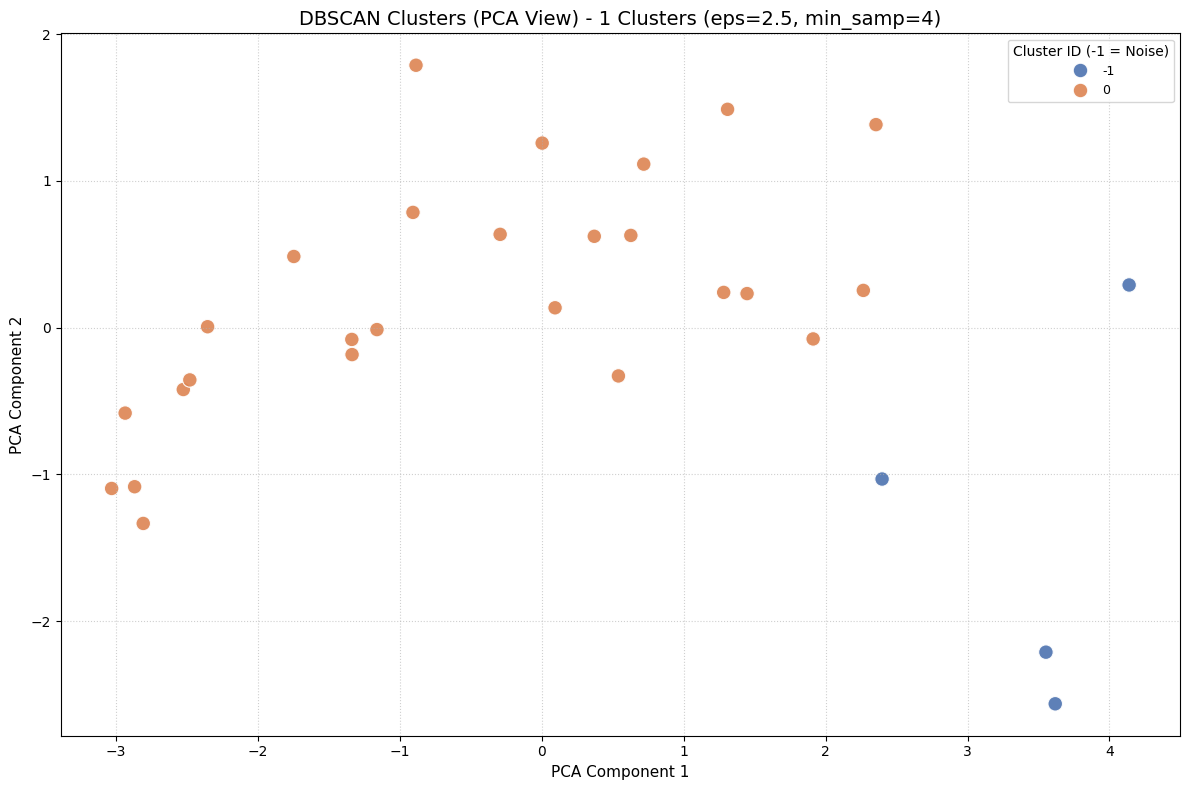


--- DBSCAN Cluster Analysis (Excluding Noise) ---
Mean Feature Values per DBSCAN Cluster:
                car_price_usd  battery_cap_kwh  drive_range_km  power_bhp  \
cluster_dbscan                                                              
0                    50307.69            62.38          451.58     219.53   

                charge_time_hours  boot_space_l  top_speed_kmh  
cluster_dbscan                                                  
0                            2.97        473.35         171.73  

Sample Cars per DBSCAN Cluster:

Cluster 0:
        Car_name  car_price_usd  battery_cap_kwh  drive_range_km  power_bhp  \
0    MG Comet EV         9975.0            17.30           230.0      41.42   
1  Tata Tiago EV        10862.5            19.20           250.0      60.34   
2  Tata Tigor EV        15612.5            26.00           315.0      73.75   
3       MG ZS EV        29225.0            50.30           461.0     174.33   
4     BYD Atto 3        42487.5           

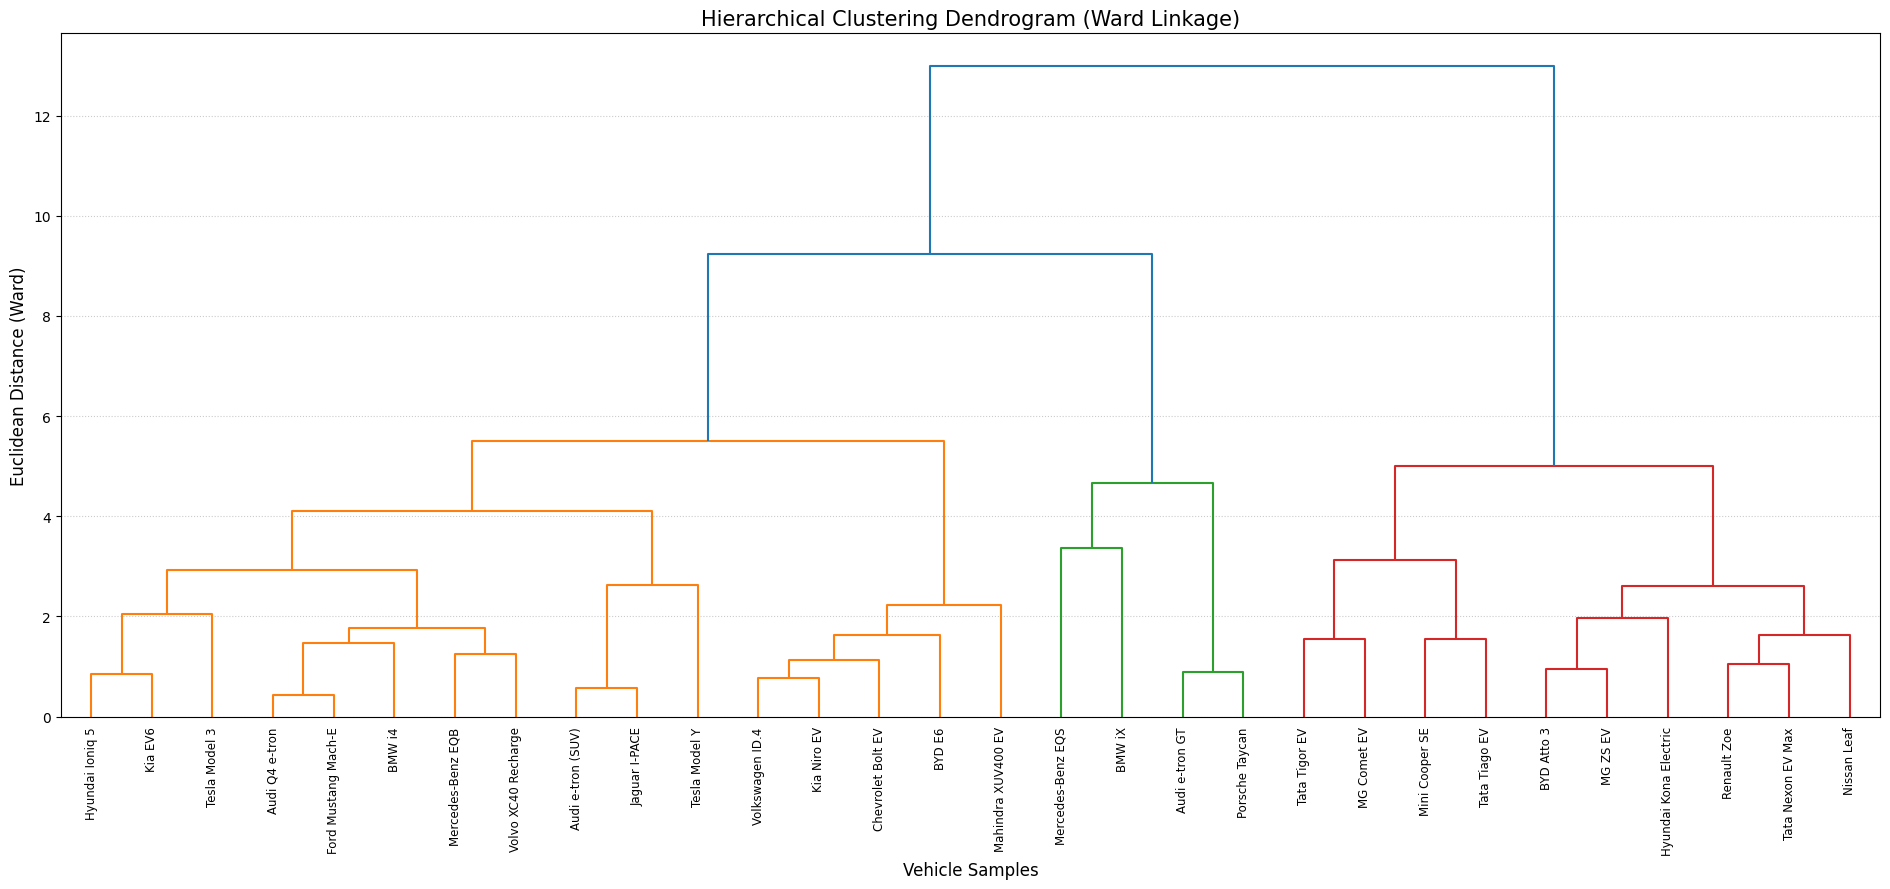


Applying Agglomerative Clustering for 4 clusters.


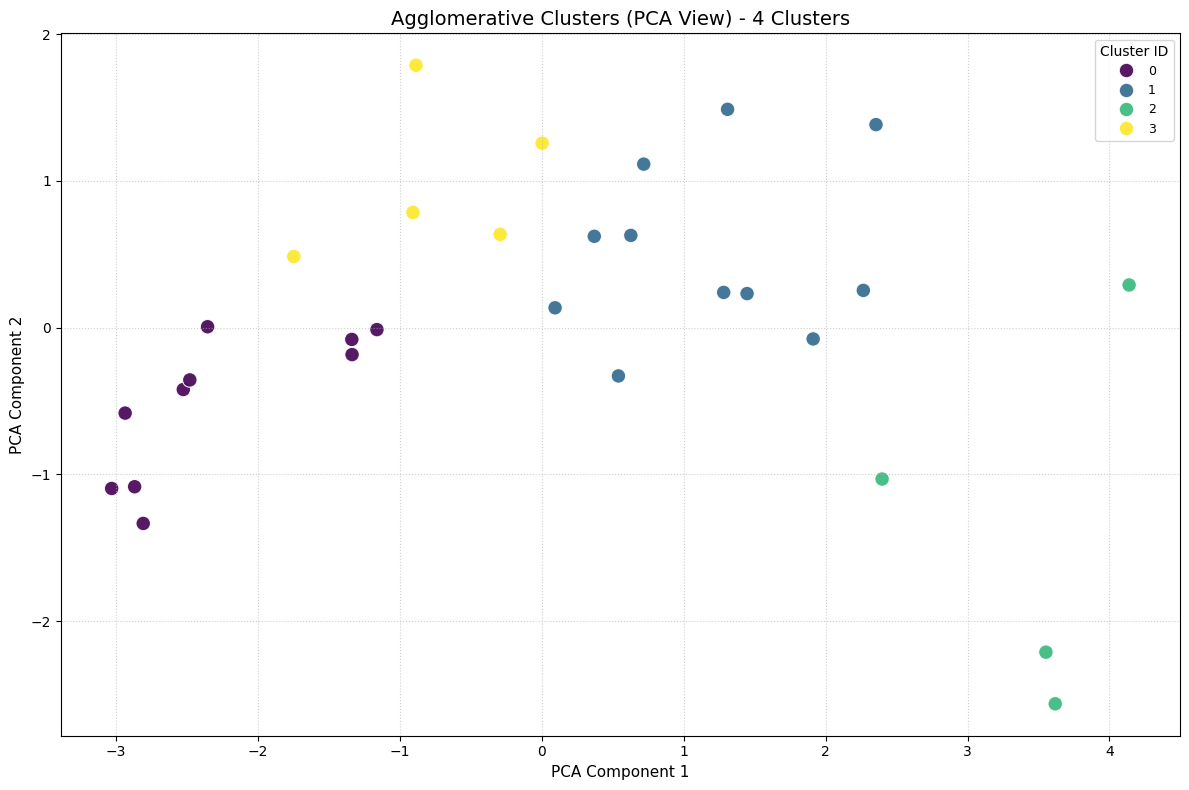


--- Agglomerative Cluster Analysis ---
Mean Feature Values per Agglomerative Cluster:
                       car_price_usd  battery_cap_kwh  drive_range_km  \
cluster_agglomerative                                                   
0                           26207.50            41.34          356.40   
1                           78772.73            80.05          527.64   
2                          186250.00           101.52          596.00   
3                           35885.00            65.62          474.60   

                       power_bhp  charge_time_hours  boot_space_l  \
cluster_agglomerative                                               
0                         128.81               6.65        362.60   
1                         325.12               0.52        568.82   
2                         542.75               3.07        511.50   
3                         168.67               0.98        484.80   

                       top_speed_kmh  
cluster_agglomerativ

In [3]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

electric_vehicle_data = {
    'Car_name': ['MG Comet EV', 'Tata Tiago EV', 'Tata Tigor EV', 'MG ZS EV', 'BYD Atto 3',
                 'Hyundai Kona Electric', 'Tata Nexon EV Max', 'Mahindra XUV400 EV', 'Kia EV6', 'BYD E6',
                 'Hyundai Ioniq 5', 'BMW iX', 'BMW i4', 'Volvo XC40 Recharge', 'Mercedes-Benz EQB',
                 'Kia Niro EV', 'Mini Cooper SE', 'Porsche Taycan', 'Audi e-tron GT', 'Jaguar I-PACE',
                 'Mercedes-Benz EQS', 'Audi e-tron (SUV)', 'Tesla Model 3', 'Tesla Model Y', 'Nissan Leaf',
                 'Renault Zoe', 'Chevrolet Bolt EV', 'Ford Mustang Mach-E', 'Volkswagen ID.4', 'Audi Q4 e-tron'],
    'Car_price': ['7.98 lakh', '8.69 - 11.99 lakh', '12.49 - 13.75 lakh', '23.38 - 27.40 lakh', '33.99 - 34.49 lakh',
                  '23.84 lakh', '16.49 - 18.79 lakh', '15.99 - 18.99 lakh', '60.95 - 65.95 lakh', '29.15 lakh',
                  '45.95 lakh', '1.21 Cr', '73.90 lakh', '56.90 lakh', '77.50 lakh',
                  '40000 EUR', '35000 EUR', '1.5 Cr', '1.7 Cr', '1.0 Cr',
                  '1.55 Cr', '1.02 Cr', '55000 USD', '65000 USD', '32000 USD',
                  '30000 EUR', '37000 USD', '45000 USD', '42000 USD', '50000 EUR'],
    'Batter_cap': ['17.3 kWh', '19.2 KWh', '26 kWh', '50.3 kWh', '60.48 kWh',
                   None, '40.5 kWh', '39.4 kWh', '77.4 kWh', '71.7 kWh',
                   None, '111.5 kWh', '83.9 kWh', '78 kWh', '66.5 kWh',
                   None, '32.6 kWh', '93.4 kWh', '93.4 kWh', '90 kWh',
                   '107.8 kWh', '95 kWh', '75 kWh', '82 kWh', '40 kWh',
                   '52 kWh', '65 kWh', '75.7 kWh', '77 kWh', '82 kWh'],
    'Drive_range': ['230 km/full charge', '250 km/full charge', '315 km/full charge', '461 km/full charge', '521 km/full charge',
                    '452 km/full charge', '437 km/full charge', '456 km/full charge', '708 km/full charge', '520 km/full charge',
                    '631 km/full charge', '630 km (WLTP)', '590 km (WLTP)', '418 km (WLTP)', '423 km (WLTP)',
                    '460 km', '233 km', '484 km', '500 km', '470 km',
                    '770 km', '484 km', '560 km', '530 km', '270 km',
                    '395 km', '417 km', '480 km', '520 km', '510 km'],
    'Power': ['41.42 Bhp', '60.34 - 73.75 Bhp', '73.75 Bhp', '174.33 Bhp', '201.15 Bhp',
              '134.1 Bhp', '141 Bhp', '147.5 Bhp', '225.8 - 320.5 Bhp', '93.87 Bhp',
              '214.56 Bhp', '516 Bhp', '335 Bhp', '402 Bhp', '288 Bhp',
              '201 Bhp', '181 Bhp', '616 Bhp', '523 Bhp', '394 Bhp',
              '516 Bhp', '402 Bhp', '346 Bhp', '384 Bhp', '147 Bhp',
              '134 Bhp', '200 Bhp', '290 Bhp', '201 Bhp', '295 Bhp'],
    'Charge_time': ['7 Hours', '58 Min(10-80%)', '7.5h', '8.5 to 9 Hours', '9.5-10 Hours',
                    '6 H (7.2kW AC)', '6.5 hours (7.2kW AC)', '50 min (DC Fast)', '18 min (350kW DC)', '2 H (DC Fast)',
                    '18 min (DC Fast 350kW)', '11 hours (AC)', '30 min (DC 150kW 10-80%)', '40 min (DC 10-80%)', '32 min (DC 10-80%)',
                    '45 mins (DC Fast)', '2.5 hours (AC)', '22.5 mins (DC 5-80%)', '23 min (DC 270kW)', '45 min (DC Fast 100kW)',
                    '31 mins (DC 10-80%)', '30 min (DC Fast)', '30 min (Supercharger)', '25 min (Supercharger)', '7.5 hours (AC)',
                    '9.5 hours (AC)', '1 hour (DC Fast)', '45 mins (DC Fast)', '35 min (DC Fast)', '30 min (DC Fast)'],
    'transmission': ['Automatic', None, 'Automatic', 'Automatic', 'Automatic',
                     'Automatic', None, 'Automatic', 'Automatic', 'Automatic',
                     'Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Automatic',
                     'Automatic', 'Automatic', '2-Speed Automatic', '2-Speed Automatic', 'Single Speed Automatic',
                     'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic', 'Single Speed Automatic',
                     'Automatic', 'Automatic', 'Single Speed Automatic', 'Automatic', 'Automatic'],
    'Boot_space': [None, '240 L', '316 L', None, '440 L',
                   '332 L', '350 L', '378 L', '585 L', '550 L',
                   '527 L', '500 L', '470 L', '419 L + 31 L (frunk)', '495 L',
                   '475 L', '211 L', '366 L + 84 L (frunk)', '405 L + 81 L (frunk)', '540 L + 57L (frunk)',
                   '610 L', '660 L', '561 L', '854 L (rear)', '435 L',
                   '338 L', '478 L', '402 L + 136 L (frunk)', '543 L', '520 L' ],
    'Top_speed': [None, None, None, '175 km/h', '160 km/h',
                  '167 km/h', '140 km/h', '150 km/h', '185 km/h', '130 km/h',
                  '185 km/h', '200 km/h', '190 km/h', '180 km/h', '160 km/h',
                  '167 km/h', '150 km/h', '260 km/h', '250 km/h', '200 km/h',
                  '210 km/h', '200 km/h', '225 km/h', '217 km/h', '144 km/h',
                  '135 km/h', '145 km/h', '180 km/h', '160 km/h', '180 km/h']
}

ev_df = pd.DataFrame(electric_vehicle_data)
print("--- Initial Electric Vehicle Dataset ---")
print(ev_df.head())

def extract_numeric_value(text_input):
    if pd.isna(text_input):
        return np.nan
    match_result = re.search(r'(\d[\d,]*\.?\d*|\d+)', str(text_input).replace(',', ''))
    return float(match_result.group(1)) if match_result else np.nan

def standardize_price_to_usd(price_string):
    if pd.isna(price_string): return np.nan
    price_string = str(price_string).upper().replace(',', '')
    numeric_price = extract_numeric_value(price_string)
    if numeric_price is None: return np.nan

    usd_per_eur_rate = 1.1
    inr_per_usd_rate = 80
    lakh_unit = 100000
    crore_unit = 10000000

    if 'USD' in price_string: return numeric_price
    elif 'EUR' in price_string: return numeric_price * usd_per_eur_rate
    elif 'CR' in price_string: return (numeric_price * crore_unit) / inr_per_usd_rate
    elif 'LAKH' in price_string: return (numeric_price * lakh_unit) / inr_per_usd_rate
    elif 'INR' in price_string: return numeric_price / inr_per_usd_rate
    else: return numeric_price

def convert_charge_time_to_hours(time_string):
    if pd.isna(time_string): return np.nan
    time_string = str(time_string).lower()
    total_hours = 0.0

    hours_match = re.search(r'(\d+\.?\d*)\s*(?:hours|hrs|h)(?!\w)', time_string)
    if hours_match:
        total_hours += float(hours_match.group(1))

    minutes_match = re.search(r'(\d+\.?\d*)\s*(?:minutes|mins|min)(?!\w)', time_string)
    if minutes_match:
        total_hours += float(minutes_match.group(1)) / 60

    if total_hours == 0:
        unmarked_number_match = re.match(r'^(\d+\.?\d+)$', time_string.strip())
        if unmarked_number_match:
            total_hours = float(unmarked_number_match.group(1))

    return total_hours if total_hours > 0 else np.nan

def calculate_total_boot_space(space_string):
    if pd.isna(space_string): return np.nan
    extracted_numbers = re.findall(r'(\d+\.?\d*)', str(space_string))
    return sum(float(num) for num in extracted_numbers) if extracted_numbers else np.nan

def classify_transmission_type(transmission_description):
    if pd.isna(transmission_description):
        return np.nan
    transmission_description = str(transmission_description).lower()
    if 'automatic' in transmission_description:
        if '2-speed' in transmission_description or 'two-speed' in transmission_description:
            return '2-Speed Automatic'
        return 'Single Speed Automatic'
    elif 'manual' in transmission_description:
        return 'Manual'
    return 'Other'

processed_ev_df = ev_df.copy()
processed_ev_df['car_price_usd'] = processed_ev_df['Car_price'].apply(standardize_price_to_usd)
processed_ev_df['battery_cap_kwh'] = processed_ev_df['Batter_cap'].apply(extract_numeric_value)
processed_ev_df['drive_range_km'] = processed_ev_df['Drive_range'].apply(extract_numeric_value)
processed_ev_df['power_bhp'] = processed_ev_df['Power'].apply(extract_numeric_value)
processed_ev_df['charge_time_hours'] = processed_ev_df['Charge_time'].apply(convert_charge_time_to_hours)
processed_ev_df['boot_space_l'] = processed_ev_df['Boot_space'].apply(calculate_total_boot_space)
processed_ev_df['top_speed_kmh'] = processed_ev_df['Top_speed'].apply(extract_numeric_value)
processed_ev_df['transmission_type'] = processed_ev_df['transmission'].apply(classify_transmission_type)

numerical_cols = ['car_price_usd', 'battery_cap_kwh', 'drive_range_km', 'power_bhp', 'charge_time_hours', 'boot_space_l', 'top_speed_kmh']
categorical_cols = ['transmission_type']

print("\n--- Imputing Missing Values ---")
for col_name in numerical_cols:
    if processed_ev_df[col_name].isnull().any():
        impute_median = processed_ev_df[col_name].median()
        print(f"Filling missing values in '{col_name}' with median: {impute_median:.2f}")
        processed_ev_df[col_name] = processed_ev_df[col_name].fillna(impute_median)

for col_name in categorical_cols:
    if processed_ev_df[col_name].isnull().any():
        impute_mode = processed_ev_df[col_name].mode()[0]
        print(f"Filling missing values in '{col_name}' with mode: '{impute_mode}'")
        processed_ev_df[col_name] = processed_ev_df[col_name].fillna(impute_mode)

vehicle_names = processed_ev_df['Car_name']
analysis_df = processed_ev_df[numerical_cols + categorical_cols].copy()

print("\n--- Sample of Processed Data for Analysis ---")
print(analysis_df.head())

feature_preprocessor = ColumnTransformer(
    transformers=[
        ('num_transform', StandardScaler(), numerical_cols),
        ('cat_transform', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

prepared_features = feature_preprocessor.fit_transform(analysis_df)
# Assuming K-Means optimal K was found previously, or set a default
optimal_k_from_kmeans = 4

print("\n--- Shape of Features Ready for Clustering ---")
print(prepared_features.shape)

print("\n\n--- DBSCAN Clustering Analysis ---")
dbscan_min_samples = max(2, prepared_features.shape[1] // 2)
dbscan_eps_options = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
best_dbscan_silhouette = -float('inf')
optimal_dbscan_eps = -1

print(f"Configuring DBSCAN with min_samples: {dbscan_min_samples}")

for current_eps in dbscan_eps_options:
    dbscan_model_instance = DBSCAN(eps=current_eps, min_samples=dbscan_min_samples)
    current_dbscan_labels = dbscan_model_instance.fit_predict(prepared_features)

    num_clusters_found = len(set(current_dbscan_labels)) - (1 if -1 in current_dbscan_labels else 0)
    num_noise_points = list(current_dbscan_labels).count(-1)

    print(f"\nResults for eps={current_eps}:")
    print(f"  Identified clusters: {num_clusters_found}")
    print(f"  Identified noise points: {num_noise_points}")

    if num_clusters_found > 1 and num_clusters_found < len(prepared_features):
        try:
            current_silhouette = silhouette_score(prepared_features, current_dbscan_labels)
            print(f"  Silhouette Score: {current_silhouette:.3f}")
            if current_silhouette > best_dbscan_silhouette:
                best_dbscan_silhouette = current_silhouette
                optimal_dbscan_eps = current_eps
        except ValueError as e_val:
            print(f"  Silhouette Score: Calculation failed. Reason: {e_val}")
    else:
        print("  Silhouette Score: Not calculated (invalid number of clusters).")

if optimal_dbscan_eps == -1:
    optimal_dbscan_eps = 2.5
    print(f"\nNo optimal DBSCAN configuration found. Using default eps={optimal_dbscan_eps} for demonstration.")
else:
    print(f"\nOptimal DBSCAN configuration: eps={optimal_dbscan_eps}, min_samples={dbscan_min_samples} (Silhouette: {best_dbscan_silhouette:.3f})")

final_dbscan_model = DBSCAN(eps=optimal_dbscan_eps, min_samples=dbscan_min_samples)
final_dbscan_labels = final_dbscan_model.fit_predict(prepared_features)

dbscan_clustered_df = analysis_df.copy()
dbscan_clustered_df['Car_name'] = vehicle_names
dbscan_clustered_df['cluster_dbscan'] = final_dbscan_labels
final_dbscan_cluster_count = len(set(final_dbscan_labels)) - (1 if -1 in final_dbscan_labels else 0)

if prepared_features.shape[1] > 2:
    pca_transformer_dbscan = PCA(n_components=2, random_state=42)
    pca_features_dbscan = pca_transformer_dbscan.fit_transform(prepared_features)
    pca_df_dbscan = pd.DataFrame(data=pca_features_dbscan, columns=['PCA_1', 'PCA_2'])
    pca_df_dbscan['cluster_dbscan'] = final_dbscan_labels

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster_dbscan', data=pca_df_dbscan, palette='deep', s=110, alpha=0.9, legend='full')
    plt.title(f'DBSCAN Clusters (PCA View) - {final_dbscan_cluster_count} Clusters (eps={optimal_dbscan_eps:.1f}, min_samp={dbscan_min_samples})', fontsize=14)
    plt.xlabel('PCA Component 1', fontsize=11)
    plt.ylabel('PCA Component 2', fontsize=11)
    plt.legend(title='Cluster ID (-1 = Noise)', fontsize=9, title_fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

print("\n--- DBSCAN Cluster Analysis (Excluding Noise) ---")
if final_dbscan_cluster_count > 0:
    dbscan_profile_summary = dbscan_clustered_df[dbscan_clustered_df['cluster_dbscan'] != -1].groupby('cluster_dbscan')[numerical_cols].mean().round(2)
    print("Mean Feature Values per DBSCAN Cluster:")
    print(dbscan_profile_summary)
    print("\nSample Cars per DBSCAN Cluster:")
    for cluster_id in sorted(list(set(final_dbscan_labels) - {-1})):
        print(f"\nCluster {cluster_id}:")
        print(dbscan_clustered_df[dbscan_clustered_df['cluster_dbscan'] == cluster_id][['Car_name'] + numerical_cols].head())
else:
    print("DBSCAN did not identify any significant clusters with current settings.")

dbscan_noise_df = dbscan_clustered_df[dbscan_clustered_df['cluster_dbscan'] == -1][['Car_name'] + numerical_cols]
print(f"\nNumber of noise points from DBSCAN: {len(dbscan_noise_df)}")
if not dbscan_noise_df.empty:
    print("Sample of Noise Points:")
    print(dbscan_noise_df.head())

print("\n\n--- Agglomerative Hierarchical Clustering ---")
print("Constructing Dendrogram...")
hierarchical_linkage = linkage(prepared_features, method='ward')

plt.figure(figsize=(19, 9))
dendrogram(hierarchical_linkage,
            orientation='top',
            labels=vehicle_names.values,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_rotation=90,
            leaf_font_size=8.5,
            truncate_mode=None)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=15)
plt.xlabel('Vehicle Samples', fontsize=12)
plt.ylabel('Euclidean Distance (Ward)', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.65)
plt.tight_layout()
plt.show()

num_agglomerative_clusters = optimal_k_from_kmeans
print(f"\nApplying Agglomerative Clustering for {num_agglomerative_clusters} clusters.")

agglomerative_model_instance = AgglomerativeClustering(n_clusters=num_agglomerative_clusters, linkage='ward')
agglomerative_labels_assigned = agglomerative_model_instance.fit_predict(prepared_features)

agglomerative_clustered_df = analysis_df.copy()
agglomerative_clustered_df['Car_name'] = vehicle_names
agglomerative_clustered_df['cluster_agglomerative'] = agglomerative_labels_assigned

if prepared_features.shape[1] > 2:
    pca_transformer_agglomerative = PCA(n_components=2, random_state=42)
    pca_features_agglomerative = pca_transformer_agglomerative.fit_transform(prepared_features)
    pca_df_agglomerative = pd.DataFrame(data=pca_features_agglomerative, columns=['PCA_1', 'PCA_2'])
    pca_df_agglomerative['cluster_agglomerative'] = agglomerative_labels_assigned

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PCA_1', y='PCA_2', hue='cluster_agglomerative', data=pca_df_agglomerative, palette='viridis', s=110, alpha=0.9)
    plt.title(f'Agglomerative Clusters (PCA View) - {num_agglomerative_clusters} Clusters', fontsize=14)
    plt.xlabel('PCA Component 1', fontsize=11)
    plt.ylabel('PCA Component 2', fontsize=11)
    plt.legend(title='Cluster ID', fontsize=9, title_fontsize=10)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.tight_layout()
    plt.show()

print("\n--- Agglomerative Cluster Analysis ---")
agglomerative_profile_summary = agglomerative_clustered_df.groupby('cluster_agglomerative')[numerical_cols].mean().round(2)
print("Mean Feature Values per Agglomerative Cluster:")
print(agglomerative_profile_summary)
print("\nSample Cars per Agglomerative Cluster:")
for cluster_id in range(num_agglomerative_clusters):
    print(f"\nCluster {cluster_id}:")
    print(agglomerative_clustered_df[agglomerative_clustered_df['cluster_agglomerative'] == cluster_id][['Car_name'] + numerical_cols].head())

print("\n\n--- End of Alternative Clustering Methods Analysis ---")